# Objective

* plot recent data and see if it came in and looks ok
  * do that for the raw.netcdf files!!
* check if the langleys look usable

# Imports

In [37]:
#import helpers
import numpy as np
import pathlib as pl
from importlib import reload
from qclib import by_date


In [38]:
import matplotlib.pyplot as plt

In [39]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [40]:
import atmPy.data_archives.NOAA_ESRL_GMD_GRAD.surfrad.surfrad as srf

# All channels at a single site

In [45]:
# Settings
####
pattern = '*.nc'
site = 'bnd'
p2fld = '/Volumes/grad/Inst/MFR/SURFRAD/{site}/mfrsr/raw.netcdf/v0.3/2020/'
p2fldtest = pl.Path('/Volumes/grad/Inst/MFR/SURFRAD/bnd/mfrsr/raw.netcdf/v0.3/2020/bnd_mfrsr_raw_20200101.nc')
p2fldt = pl.Path(p2fld.format(site=site))

In [46]:
def path2date(path2file):
    """
    Takes path to file and converts to date. Needs adjustment for individual
    circumstances.
    """
    return pd.to_datetime(path2file.name.split('_')[3].split('.')[0])

def read_data(path2file):
    """
    Takes the path to the file and returns an object that the
    plot function can turn into a plot. Needs ajustment for individual
    circumstances"""
    ds = xr.open_dataset(path2file)
    # ds = ds.sel(channel = [415, 500, 670, 870, 1625])
    return ds


def plot_data(data_object, a):
    ds = data_object['bla']
    variable = 'aod'
    selection = {'channel': 500}
    ds[variable].sel(selection).plot()

In [47]:
# test path2date and read_data
path2file = next(p2fldt.glob(pattern))
bla = read_data(path2file)
path2date(p2fldtest), path2file

(Timestamp('2020-01-01 00:00:00'),
 PosixPath('/Volumes/grad/Inst/MFR/SURFRAD/bnd/mfrsr/raw.netcdf/v0.3/2020/bnd_mfrsr_raw_20200424.nc'))

In [30]:
def plot_global(data_object, a):
    # for daob in data_object:
    ds = data_object['data']
    ds.global_horizontal.plot.line(x='datetime', ax=a, add_legend=False)
    a.set_ylabel('global')
    dt = pd.to_datetime(ds.datetime.values[0])
    a.set_title(f'{ds.site} -- {dt.year:04d}-{dt.month:02d}-{dt.day:02d}')
    # a.legend().remove()


def plot_diff(data_object, a):
    ds = data_object['data']
    ds.diffuse_horizontal.plot.line(x='datetime', ax=a, add_legend=False)
    a.set_ylabel('diffuse')


def plot_direct(data_object, a):
    ds = data_object['data']
    ds.direct_horizontal.plot.line(x='datetime', ax=a, add_legend=True)
    a.set_ylabel('direct')

# test

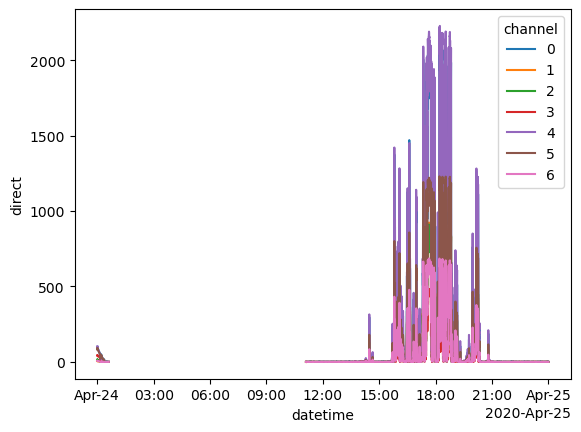

In [31]:
dato = {'data': bla}
f,a = plt.subplots()
# plot_global(dato, a)
plot_direct(dato, a)
# plot_global(dato, a)

### do it

In [39]:
# path2database = ''

In [34]:
# sites = (s.abb.lower() for s in srf.network.stations.list)

In [43]:
# site = next(sites)
site = 'tbl'
if site == 'fpk': site = 'fpe'
print(site)
print(p2fld.format(site=site))
path2datafolder = [['data', p2fld.format(site=site), read_data, path2date, pattern],
                   # ['aod_bnd', p2fld.format(site='bnd'), read_data, path2date, pattern],
                  ]
plot_function = {'global': plot_global,
                 'diffuse': plot_diff,
                 'direct': plot_direct,
                 # 'aod': plot_aod,
                }
gridspec_kwargs = {'hspace': 0}
data = by_date.Data(path2datafolder,
                    plot_function,
                    gridspec_kwargs=gridspec_kwargs,
                    verbose = True)
data_object = data.active_data
ds = data_object['data']
# data.plot()
assert(ds.site == site)

tbl
/Volumes/grad/Inst/MFR/SURFRAD/tbl/mfrsr/raw.netcdf/v0.3/2020/
Test if path2date and the load data functions work
------


StopIteration: 

In [57]:
cont = by_date.Controller(data = data,#Data('/mnt/telg/data/grad/surfrad/aod1625/0.4/tbl/2020/', read_data, plot_data),                        
                        # path2database=path2database,
                        # database_table_name_base='vis_nsascience_quicklooks',
                         )

In [58]:
cont.data.active_data['data']

<xarray.Dataset> Size: 104kB
Dimensions:                 (datetime: 681, channel: 5)
Coordinates:
  * datetime                (datetime) datetime64[ns] 5kB 2024-10-28T13:04:00...
  * channel                 (channel) int64 40B 415 500 670 870 1625
Data variables:
    solar_elevation         (datetime) float64 5kB -0.08661 ... -0.08402
    instrument_temperature  (datetime) float64 5kB 45.48 45.48 ... 45.43 45.43
    instrument_power        (datetime) float64 5kB 12.9 12.9 12.9 ... 12.9 12.9
    global_horizontal       (datetime, channel) float64 27kB nan nan ... nan nan
    diffuse_horizontal      (datetime, channel) float64 27kB nan nan ... nan nan
    direct_normal           (datetime, channel) float64 27kB nan nan ... nan nan
    channel_center          (channel) float64 40B 415.1 499.4 ... 1.623e+03
Attributes:
    info:             Cosine corrected SURFRAD MFRSR measurments.
    site_latitude:    40.12498
    site_longitude:   -105.2368
    site_elevation:   1689
    site_name:        Table Mountain
    site:             tbl
    instrument_type:  MFRSR
    serial_no:        660
    product_name:     raw
    product_version:  1.0

In [59]:
cont.view.controlls.initiate()

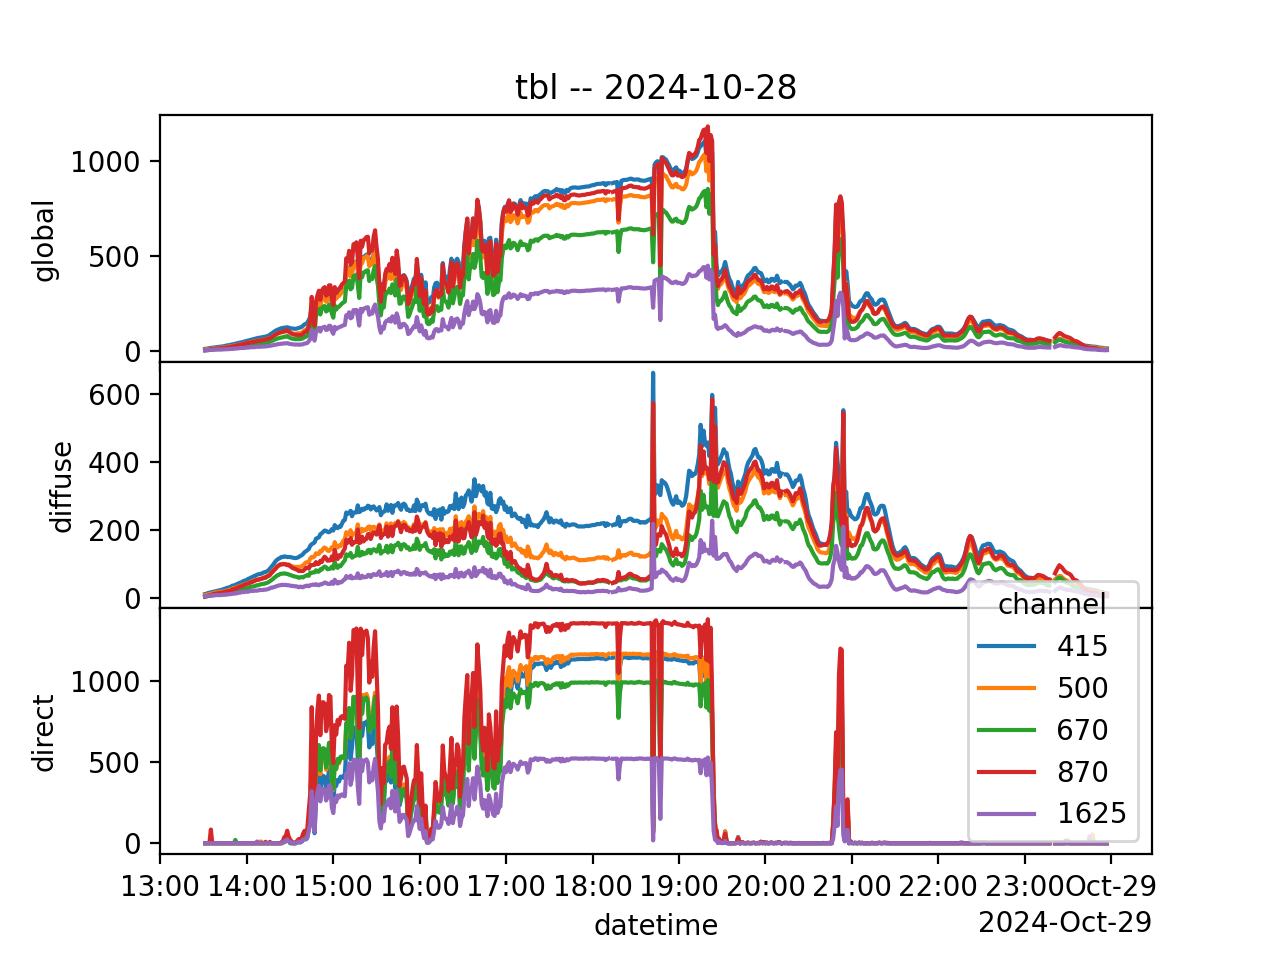

In [60]:
out = cont.view.plot.initiate()

In [35]:
# test path2date and read_data
path2file = next(p2fld.glob(pattern))
bla = read_data(path2file)
path2date(path2file)

Timestamp('2024-01-06 00:00:00')

In [36]:
data = by_date.Data(path2datafolder=[
    ['bla', p2fld, read_data, path2date, pattern]
], plot_function={'bla': plot_data, })

In [38]:
data_object = data.active_data

In [39]:
dao = data_object['bla']

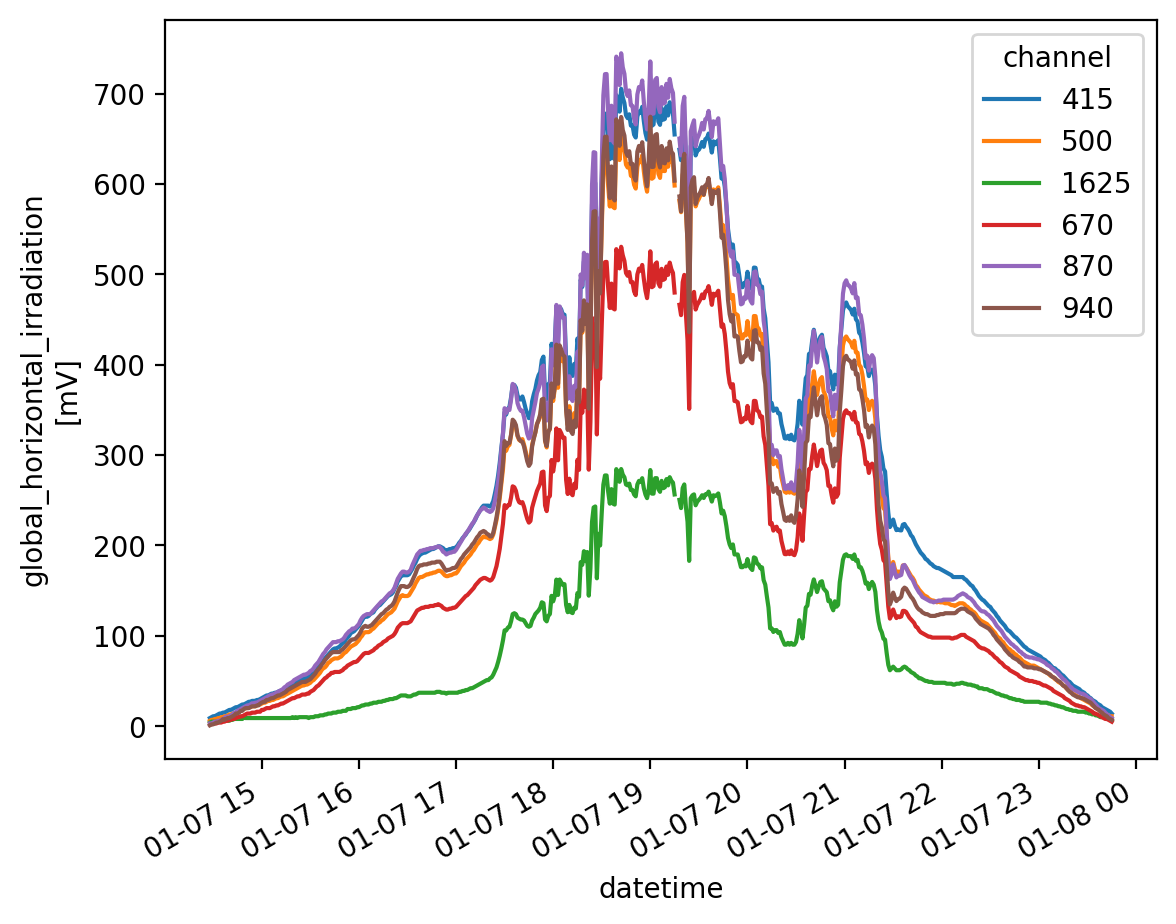

In [44]:
dao.dataset.global_horizontal_irradiation.plot.line(x = 'datetime')

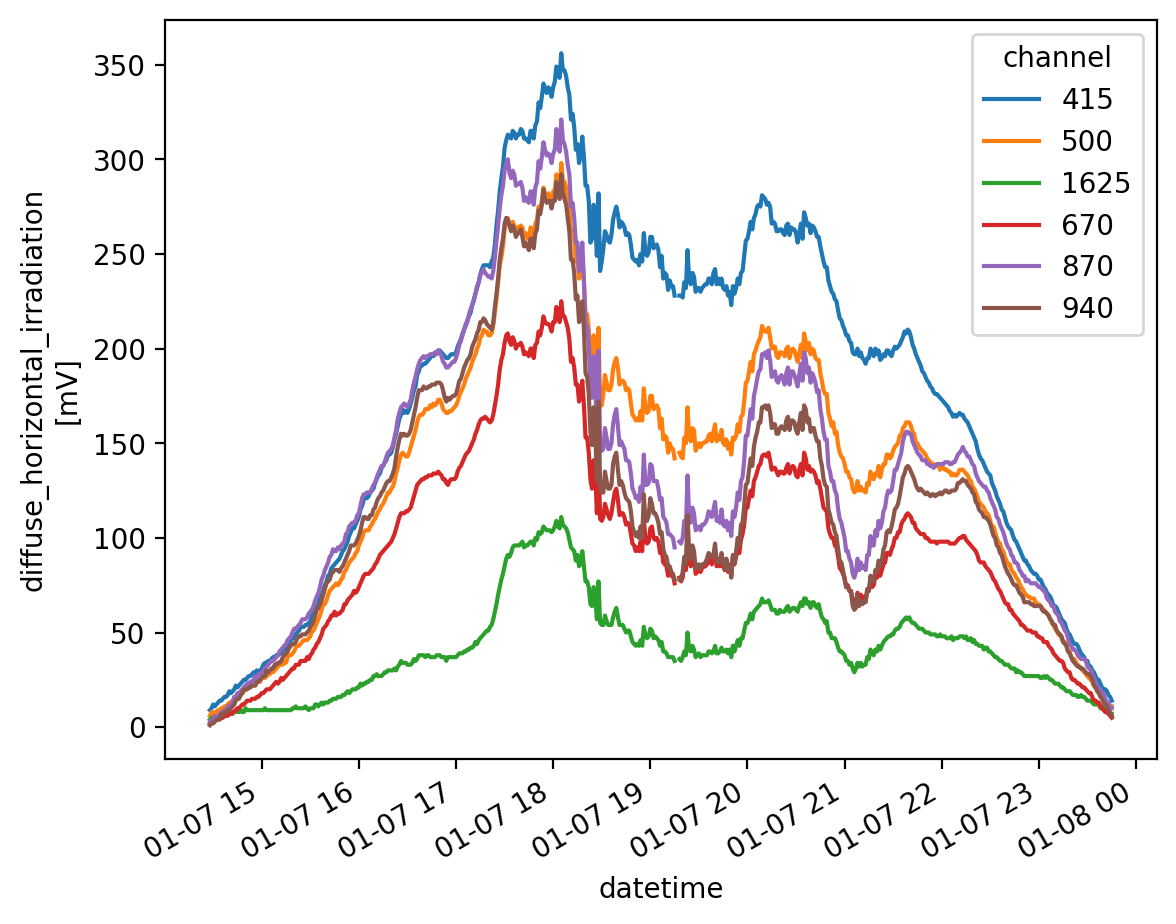

In [45]:
dao.dataset.diffuse_horizontal_irradiation.plot.line(x = 'datetime')

In [4]:
dao.dataset.diffuse_horizontal_irradiation.plot.line(x = 'datetime')

NameError: name 'dao' is not defined

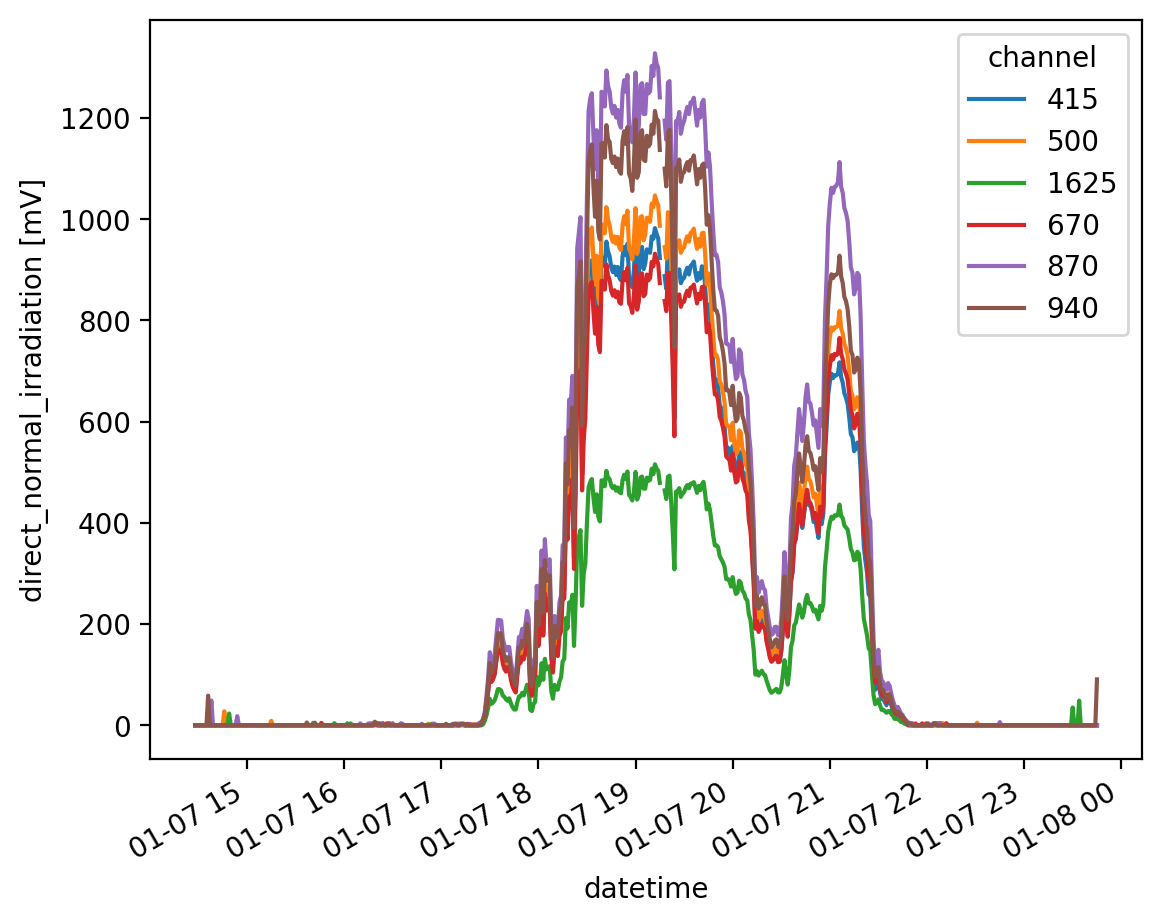

In [46]:
dao.dataset.direct_normal_irradiation.plot.line(x = 'datetime')

## realtime aod

Todo:
* add langleys

In [1]:
def path2date(path2file):
    """
    Takes path to file and converts to date. Needs adjustment for individual
    circumstances.
    """
    return pd.to_datetime(path2file.name.split('.')[0].split('_')[-1])


def read_data(path2file):
    """
    Takes the path to the file and returns an object that the
    plot function can turn into a plot. Needs ajustment for individual
    circumstances"""
    ds = xr.open_dataset(path2file)
    ds = ds.sel(channel = [415, 500, 670, 870, 1625])
    return ds


def plot_data(data_object, a):
    ds = data_object['bla']
    variable = 'aod'
    selection = {'channel': 500}
    ds[variable].sel(selection).plot()

In [2]:
# p2fld = '/nfs/grad/Inst/MFR/SURFRAD/dra/mfrsr/ccc/2019/dra20190728_0669.ccc'
dt = pd.Timestamp.now()
pattern = f'*predict_{dt.year:04d}-{dt.month:02d}-{dt.day:02d}.nc'
# pattern
p2fld = pl.Path('/export/htelg/data/grad/surfrad/aod_3/3.0/tbl/2024')
# list(p2fld.glob(pattern))

In [3]:
# test path2date and read_data
path2file = next(p2fld.glob(pattern))
bla = read_data(path2file)
path2date(path2file)

StopIteration: 

In [7]:
def plot_global(data_object, a):
    ds = data_object['aod_rt']
    ds.global_horizontal.plot.line(x='datetime', ax=a, add_legend=False)
    a.set_ylabel('global')
    # a.legend().remove()


def plot_diff(data_object, a):
    ds = data_object['aod_rt']
    ds.diffuse_horizontal.plot.line(x='datetime', ax=a, add_legend=False)
    a.set_ylabel('diffuse')


def plot_direct(data_object, a):
    ds = data_object['aod_rt']
    ds.direct_normal.plot.line(x='datetime', ax=a, add_legend=True)
    a.set_ylabel('direct')

def plot_aod(data_object, a):
    ds = data_object['aod_rt']
    # sel = ds.aod.sel(channel = [1625, 415, 500, 670, 870])
    sel = ds.aod
    sel.plot.line(x='datetime', ax=a, add_legend=False)


In [8]:
path2datafolder = [['aod_rt', p2fld, read_data, path2date, pattern]]
plot_function = {'global': plot_global,
                 'diffuse': plot_diff,
                 'direct': plot_direct,
                 'aod': plot_aod}
gridspec_kwargs = {'hspace': 0}
data = by_date.Data(path2datafolder,
                    plot_function,
                    gridspec_kwargs=gridspec_kwargs)
data_object = data.active_data
ds = data_object['aod_rt']
# data.plot()

In [9]:
cont = by_date.Controller(data = data,#Data('/mnt/telg/data/grad/surfrad/aod1625/0.4/tbl/2020/', read_data, plot_data),                        
                        # path2database=path2database,
                        # database_table_name_base='vis_nsascience_quicklooks',
                         )

In [10]:
cont.view.controlls.initiate()

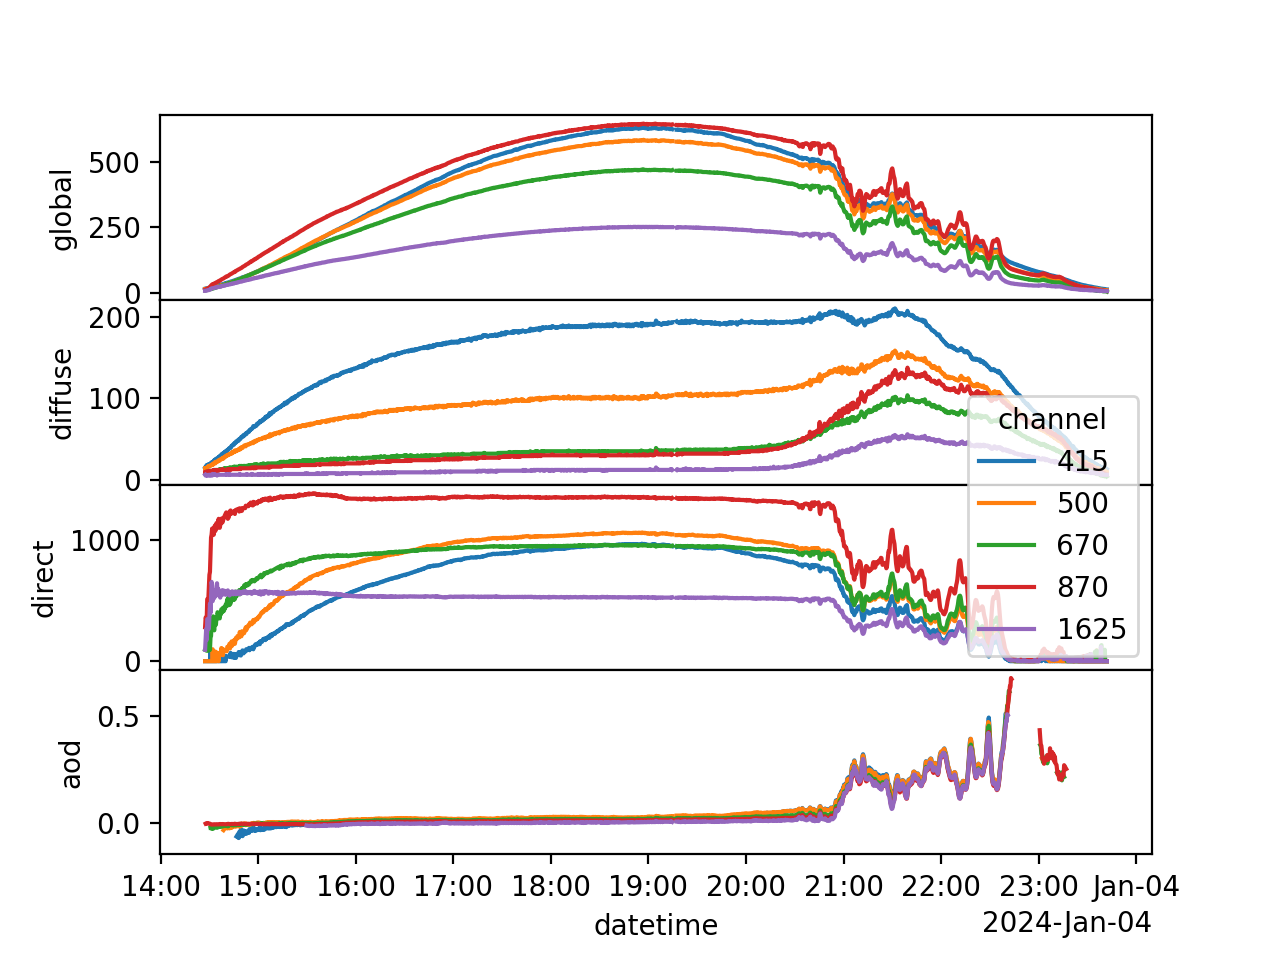

In [340]:
%matplotlib widget
out = cont.view.plot.initiate()

In [13]:
cont.data.active_files.iloc[0]
# PosixPath('/export/htelg/data/grad/surfrad/aod_3/3.0/tbl/2024/srf_aod1625_tbl_20240102.predict_2024-02-20.nc')

PosixPath('/export/htelg/data/grad/surfrad/aod_3/3.0/tbl/2024/srf_aod1625_tbl_20240102.predict_2024-02-20.nc')

In [341]:
dsn = cont.data.active_data['aod_rt']

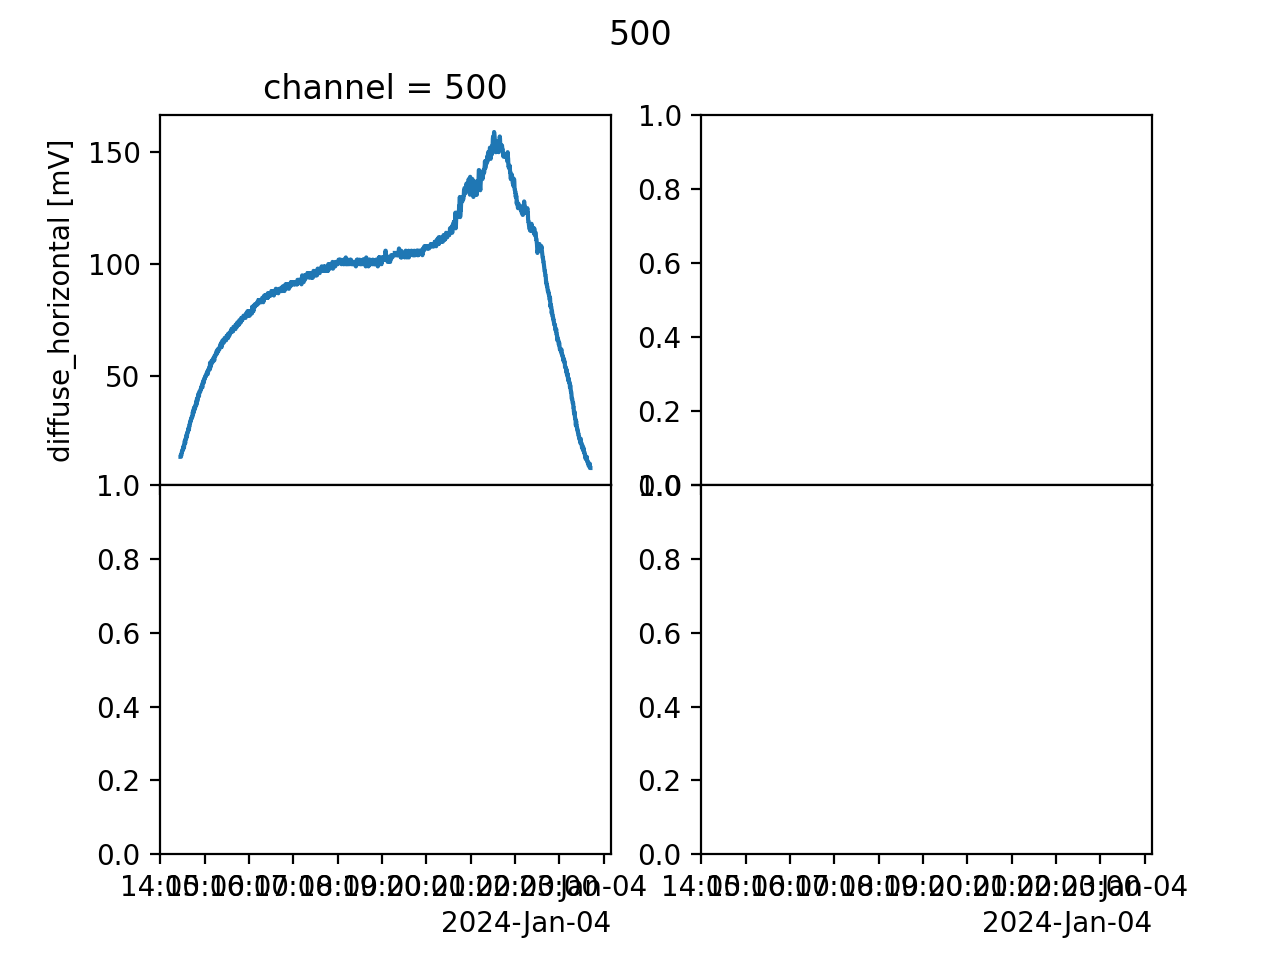

In [343]:
#######
### Plot comparison to clearsky
channel = 500
f,aa = plt.subplots(2,2, sharex = True, gridspec_kw={'hspace': 0})
f.suptitle(f'{channel}')
###########################3
a = aa[0][0]
diffuse = dsn.diffuse_horizontal.sel(channel = channel)
diffuse.plot(ax = a)

In [1025]:
ds

<xarray.Dataset>
Dimensions:               (channel: 5, datetime: 4320, ang_channels: 4,
                           sun_params: 4)
Coordinates:
  * channel               (channel) int64 415 500 670 870 1625
  * datetime              (datetime) datetime64[ns] 2024-01-02T07:00:00 ... 2...
  * ang_channels          (ang_channels) <U8 '415_670' '500_870' ... '870_1625'
  * sun_params            (sun_params) <U18 'elevation' ... 'sun_earth_distance'
Data variables: (12/14)
    od_co2                (datetime, channel) float32 ...
    od_ch4                (datetime, channel) float32 ...
    od_h2o                (datetime, channel) float32 ...
    aod                   (datetime, channel) float32 ...
    od_rayleigh           (datetime, channel) float32 ...
    od_total              (datetime, channel) float32 ...
    ...                    ...
    cloudmask_michalsky   (datetime) float32 ...
    transmission          (datetime, channel) float32 ...
    global_horizontal     (datetime, channel) float32 ...
    direct_normal         (datetime, channel) float32 ...
    diffuse_horizontal    (datetime, channel) float32 ...
    sun_position          (datetime, sun_params) float32 ...
Attributes:
    site_latitude:       40.12498
    site_longitude:      -105.2368
    site_elevation:      1689
    site_name:           Table Mountain
    site:                tbl
    MFRSR_serial_no:     660
    creation_timestamp:  2024-02-20 04:15:29.046414
    product_version:     3.0

# atmpy clear sky 

In [1]:
import atmPy.radiation.observations.spectral_irradiance as atmsi

In [2]:
path = pl.Path('/export/htelg/data/grad/surfrad/aod_3/3.0/tbl/2024/srf_aod1625_tbl_20240102.predict_2024-02-20.nc')

In [3]:
ds = xr.open_dataset(path)

In [522]:
reload(atmsi)

<module 'atmPy.radiation.observations.spectral_irradiance' from '/export/htelg/prog/atm-py/atmPy/radiation/observations/spectral_irradiance.py'>

In [523]:
si = atmsi.SolarIrradiation(ds.copy())
si.path2file = path
si.dataset.attrs['product_name'] = 'aod_rt'

In [524]:
rdb.connection.close()
rdb.path2db.unlink()

In [525]:
rdb =atmsi.RadiationDatabase()

In [526]:
#si.dataset


In [527]:
rdb.initiat_new_db(si)

In [528]:
# pd.read_sql_query('select * from sites', rdb.connection)
# pd.read_sql_query('select * from instrument_type', rdb.connection)
# rdb.connection.execute('select * from channels').fetchall()

In [531]:
# df = 
si.clearsky.add_clearsky_parameters2database(rdb)

In [532]:
pd.read_sql_query(f'''select * from clearsky_params ''', rdb.connection)

fit_id  file_id  site_id  channel_id   dateoffit         observation  \
0        1        1        1           1  2024-02-23   global_horizontal   
1        2        1        1           1  2024-02-23  diffuse_horizontal   
2        3        1        1           1  2024-02-23       direct_normal   
3        4        1        1           2  2024-02-23   global_horizontal   
4        5        1        1           2  2024-02-23  diffuse_horizontal   
5        6        1        1           2  2024-02-23       direct_normal   
6        7        1        1           3  2024-02-23   global_horizontal   
7        8        1        1           3  2024-02-23  diffuse_horizontal   
8        9        1        1           3  2024-02-23       direct_normal   
9       10        1        1           4  2024-02-23   global_horizontal   
10      11        1        1           4  2024-02-23  diffuse_horizontal   
11      12        1        1           4  2024-02-23       direct_normal   
12      13        1        1           5  2024-02-23   global_horizontal   
13      14        1        1           5  2024-02-23  diffuse_horizontal   
14      15        1        1           5  2024-02-23       direct_normal   
15      16        1        1           6  2024-02-23   global_horizontal   
16      17        1        1           6  2024-02-23  diffuse_horizontal   
17      18        1        1           6  2024-02-23       direct_normal   

       psym3      psym2       psym1        psym0        prest5        prest4  \
0  -1.081653  23.274094 -173.250212   526.957883 -1.194987e-21  1.358141e-15   
1  -0.034099   0.688458   -4.760329    19.093473 -5.546741e-22  8.896640e-17   
2  -0.072803   0.932100   -6.788979   536.096913 -1.389935e-19  1.066241e-14   
3  -3.634209  77.680030 -561.832206  1518.002547  3.269662e-20  1.728587e-15   
4  -0.130260   3.860351  -45.259977   268.977315  5.082133e-21 -3.411191e-16   
5  -1.985529  50.435368 -473.751113  1794.966792  1.370000e-19 -8.696940e-15   
6  -3.016651  64.978228 -478.215148  1341.649975  2.514426e-20  1.562110e-15   
7  -0.034996   1.113454  -15.089908   125.835492 -4.942007e-21  3.644439e-16   
8  -0.668087  19.768824 -251.938664  1529.338219  3.738348e-20 -2.182728e-15   
9  -2.216024  47.775685 -354.692595  1033.448225  5.998045e-21  2.102922e-15   
10 -0.031923   0.721071   -6.491135    44.554651 -6.416007e-21  5.162269e-16   
11 -0.245491   6.002493  -88.746303  1124.121868 -1.517105e-19  1.176402e-14   
12 -2.871816  61.802318 -459.595747  1376.802954 -1.995526e-21  3.482479e-15   
13 -0.064659   1.348396   -9.952128    45.297318 -5.986732e-21  5.307382e-16   
14 -0.310693   5.147767  -51.479914  1441.477181 -3.480647e-19  2.662112e-14   
15 -3.255038  68.732694 -488.303703  1256.266097 -2.125206e-20  5.539284e-15   
16 -0.083517   1.728286  -12.252882    38.279112 -5.750299e-21  5.368924e-16   
17 -1.413060  33.940606 -325.613323  1602.148162 -1.447170e-19  1.243908e-14   

          prest3        prest2    prest1      prest0  nrmse_sym  \
0  -7.826709e-11  1.532658e-06 -0.011646   29.567261   0.062262   
1  -3.954380e-12  6.919319e-08 -0.000403   -0.118252   0.083367   
2  -3.159691e-10  4.468692e-06 -0.030867   90.407798   0.052499   
3  -1.770863e-10  3.889025e-06 -0.030309   76.098890   0.085094   
4   5.718182e-12  2.519008e-08 -0.000987    3.364570   0.008777   
5   1.837665e-10 -1.389057e-06 -0.002637   71.499532   0.053727   
6  -1.510374e-10  3.308603e-06 -0.026071   67.411934   0.075523   
7  -1.112058e-11  1.759228e-07 -0.001145    0.447571   0.019147   
8   2.066119e-11  6.532934e-07 -0.016157  108.918217   0.054371   
9  -1.394307e-10  2.839070e-06 -0.021818   54.896905   0.068085   
10 -1.517589e-11  1.969406e-07 -0.000911   -0.566309   0.046862   
11 -3.606505e-10  5.395991e-06 -0.040899  137.146104   0.051163   
12 -2.031536e-10  3.992892e-06 -0.030355   76.754851   0.064173   
13 -1.663095e-11  2.214410e-07 -0.001006   -0.683854   0.066575   
14 -7.878547e-10  1.115814e-05 -0

In [501]:
pd.read_sql_query(f'''select * from clearsky_params 
                      where file_id=(select file_id from files where path="{path.as_posix()}")
                          and channel_id=1
                          and observation="global_horizontal"
                      ''', rdb.connection)

fit_id  file_id  site_id  channel_id   dateoffit        observation  \
0       1        1        1           1  2024-02-23  global_horizontal   

      psym3      psym2       psym1       psym0        prest5        prest4  \
0 -1.081653  23.274094 -173.250212  526.957883 -1.194987e-21  1.358141e-15   

         prest3    prest2    prest1     prest0  nrmse_sym  nrmse_clearsky  
0 -7.826709e-11  0.000002 -0.011646  29.567261   0.062262        0.048578

In [207]:
rdb.connection.execute('select * from clearsky_params').fetchall()

[(1,
  b'\x01\x00\x00\x00\x00\x00\x00\x00',
  b'\x01\x00\x00\x00\x00\x00\x00\x00',
  1,
  '2024-02-23 12:27:09.244682',
  'diffuse_horizontal',
  -0.0340994824542943,
  0.6884583829283029,
  -4.7603285550351275,
  19.093473133670784,
  -5.546741342128701e-22,
  8.896640317027434e-17,
  -3.954379861880504e-12,
  6.919318900352585e-08,
  -0.00040294674683828707,
  -0.11825178920220143,
  0.08336727321147919,
  0.0536373231725547)]

In [176]:
conn = rdb.connection

In [188]:
df.loc[0,'file']

1

In [ ]:
df.loc[0,'file'] =pd.read_sql_query(f"SELECT * FROM files where path='{df.file.iloc[0].as_posix()}'", conn).file_id.iloc[0]
df.loc[0,'site'] = pd.read_sql_query(f"SELECT * FROM sites where abb='{df.site.iloc[0]}'", conn).site_id.iloc[0]
df.loc[0,'channel'] = pd.read_sql_query(f"SELECT * FROM channels where name='{df.channel.iloc[0]}'", conn).channel_id.iloc[0]

df = df.rename({'file': 'file_id', 
           'site': 'site_id',
           'channel': 'channel_id'}, axis = 1)

In [189]:
df.index

file site  channel                  dateoffit         observation     psym3  \
0    1    1        1 2024-02-23 12:15:57.301582  diffuse_horizontal -0.034099   

      psym2     psym1      psym0        prest5        prest4        prest3  \
0  0.688458 -4.760329  19.093473 -5.546741e-22  8.896640e-17 -3.954380e-12   

         prest2    prest1    prest0  nrmse_sym  nrmse_clearsky  
0  6.919319e-08 -0.000403 -0.118252   0.083367        0.053637

In [85]:
file_id

1

In [ ]:
        # if file_id.shape[0] == 0:
        #     file_id = add_file2db(conn, path, date, date_created, site, product_name='AOD_rt')
        # else:
        #     file_id.iloc[0]

In [ ]:
table_name = 'clearsky_fits'
try:
    index = conn.execute(f"SELECT max(fit_id)+1 FROM {table_name}").fetchall()[0][0]
    # assert(pd.read_sql_query(f"SELECT * FROM files Where name = '{name}'", conn).shape[0] == 0), 'file with that name already exists'
except Exception as e:
    # Only needed on the very first run, when there is no sites yet
    if e.args[0] == f'no such table: {table_name}':
        index = 1
    else:
        raise

In [1005]:
pd.read_sql_query('select * from clearsky_fits', conn)

fit_id  file_id  site_id  channel_id                   dateoffit  \
0       1        1        1           1  2024-02-22 15:56:47.069274   
1       2        1        1           1  2024-02-22 15:56:47.069274   
2       3        1        1           2  2024-02-22 15:56:47.069274   
3       4        1        1           2  2024-02-22 15:56:47.069274   
4       5        1        1           3  2024-02-22 15:56:47.069274   
5       6        1        1           3  2024-02-22 15:56:47.069274   
6       7        1        1           4  2024-02-22 15:56:47.069274   
7       8        1        1           4  2024-02-22 15:56:47.069274   
8       9        1        1           5  2024-02-22 15:56:47.069274   
9      10        1        1           5  2024-02-22 15:56:47.069274   

          observation     psym3      psym2       psym1        psym0  \
0  diffuse_horizontal -0.130260   3.860351  -45.259977   268.977315   
1       direct_normal -1.985529  50.435368 -473.751113  1794.966792   
2  diffuse_horizontal -0.034996   1.113454  -15.089908   125.835492   
3       direct_normal -0.668087  19.768824 -251.938664  1529.338219   
4  diffuse_horizontal -0.031923   0.721071   -6.491135    44.554651   
5       direct_normal -0.245491   6.002493  -88.746303  1124.121868   
6  diffuse_horizontal -0.064659   1.348396   -9.952128    45.297318   
7       direct_normal -0.310693   5.147767  -51.479914  1441.477181   
8  diffuse_horizontal -0.034099   0.688458   -4.760329    19.093473   
9       direct_normal -0.072803   0.932100   -6.788979   536.096913   

         prest5        prest4        prest3        prest2    prest1  \
0  5.082133e-21 -3.411191e-16  5.718182e-12  2.519008e-08 -0.000987   
1  1.370000e-19 -8.696940e-15  1.837665e-10 -1.389057e-06 -0.002637   
2 -4.942007e-21  3.644439e-16 -1.112058e-11  1.759228e-07 -0.001145   
3  3.738348e-20 -2.182728e-15  2.066119e-11  6.532934e-07 -0.016157   
4 -6.416007e-21  5.162269e-16 -1.517589e-11  1.969406e-07 -0.000911   
5 -1.517105e-19  1.176402e-14 -3.606505e-10  5.395991e-06 -0.040899   
6 -5.986732e-21  5.307382e-16 -1.663095e-11  2.214410e-07 -0.001006   
7 -3.480647e-19  2.662112e-14 -7.878547e-10  1.115814e-05 -0.077430   
8 -5.546741e-22  8.896640e-17 -3.954380e-12  6.919319e-08 -0.000403   
9 -1.389935e-19  1.066241e-14 -3.159691e-10  4.468692e-06 -0.030867   

       prest0  nrmse_sym  nrmse_clearsky  
0    3.364570   0.008777        0.005273  
1   71.499532   0.053727        0.016763  
2    0.447571   0.019147        0.008658  
3  108.918217   0.054371        0.008518  
4   -0.566309   0.046862        0.019403  
5  137.146104   0.051163        0.006785  
6   -0.683854   0.066575        0.031508  
7  227.969034   0.052572        0.006150  
8   -0.118252   0.083367        0.053637  
9   90.407798   0.052499        0.008137

# still working on - adjust the day to the day of the data, so they can be compared

In [ ]:
cdhc = clearsky.diffuse_horizontal_clearsky.sel(channel = channel)

In [ ]:
.plot(ax = a, label = 'clearsky')
clearsky.diffuse_horizontal_clearsky_symmetric.sel(channel = channel).plot(ax = a, label = 'symmetric clear')
a.set_ylim(diffuse.min()*0.9,diffuse.max()*1.1)
a.legend()

a = aa[1][0]
clearsky.diffuse_horizontal_asymmetry.sel(channel = channel).plot(ax = a, label = 'asymmetry')
clearsky.diffuse_horizontal_asymmetry_fit.sel(channel = channel).plot(ax = a, label = '5deg poly fit')
a.legend()


##############################
a = aa[0][1]
diffuse = ds.direct_normal.sel(channel = channel)
diffuse.plot(ax = a)
clearsky.direct_normal_clearsky.sel(channel = channel).plot(ax = a, label = 'clearsky')
clearsky.direct_normal_clearsky_symmetric.sel(channel = channel).plot(ax = a, label = 'symmetric clear')
a.set_ylim(diffuse.min()*0.9,diffuse.max()*1.1)
# a.legend()

a = aa[1][1]
clearsky.direct_normal_asymmetry.sel(channel = channel).plot(ax = a, label = 'asymmetry')
clearsky.direct_normal_asymmetry_fit.sel(channel = channel).plot(ax = a, label = '5deg poly fit')
# a.legend()



#################################
for a in aa.flatten():
    a.set_title('')
    a.set_ylabel('')

aa[0][1].set_title('Direct-normal')
aa[0][0].set_title('Diffuse-horizontal')

aa[0][0].set_ylabel('Irradiance (mV)')
aa[1][0].set_ylabel('$\\Delta$ Irradiance (mV)')

SyntaxError: invalid syntax (1848415902.py, line 2)

# make clearsky fits

## create the database

In [349]:
import sqlite3
from sqlite3 import Error
from contextlib import contextmanager


In [550]:
class MfrsrDatabase(object):
    def __init__(self, db_file, verbose = True):
        if not isinstance(db_file, pl.Path):
            db_file = pl.Path(db_file)
        self.db_file = db_file
        self.verbose = verbose
        
    @contextmanager
    def connection(self):
        """Create a database connection to an SQLite database specified by db_file"""
        
        if self.verbose:
            print("Esteblishing connection")
            
        conn = sqlite3.connect(self.db_file)
        try:
            yield conn
        finally:
            conn.close()

    def create_new_database(self):
        def create_table(conn, create_table_sql):
            """Create a table from the create_table_sql statement"""
            try:
                c = conn.cursor()
                c.execute(create_table_sql)
            except Error as e:
                print(e)
    
        assert(not self.db_file.is_file()), 'this file already exists, pick another one!'
        # database = "path_to_your_database.db"
        
        # SQL statement for creating the Sites table
        sql_create_site_table = """CREATE TABLE IF NOT EXISTS Sites (
                                        SiteID INTEGER PRIMARY KEY,
                                        abb TEXT,
                                        alt FLOAT,
                                        lat FLOAT,
                                        lon FLOAT
                                    );"""

        sql_create_channel_table = """CREATE TABLE IF NOT EXISTS mfrsrchannels (
                                ChannelID INTEGER PRIMARY KEY,
                                wlnominal INTEGER
                            );"""
        
        # SQL statement for creating the Files table
        sql_create_files_table = """CREATE TABLE IF NOT EXISTS Files (
                                        FileID INTEGER PRIMARY KEY,
                                        FileName TEXT NOT NULL,
                                        FilePath TEXT NOT NULL,
                                        Date TEXT NOT NULL,
                                        SiteID INTEGER NOT NULL,
                                        DateProcessed TEXT
                                    );"""

        # SQL statement for creating the Fits table
        sql_create_fits_table = """CREATE TABLE IF NOT EXISTS Fits (
                                        FitID INTEGER PRIMARY KEY,
                                        FileID INTEGER NOT NULL,
                                        SiteID INTEGER NOT NULL, 
                                        ChannelID INTEGER NOT NULL,
                                        DateOfFit TEXT NOT NULL,
                                        psym3 FLOAT NOT NULL,
                                        psym2 FLOAT NOT NULL,
                                        psym1 FLOAT NOT NULL,
                                        psym0 FLOAT NOT NULL,
                                        psymstd FLOAT NOT NULL,
                                        prest5 FLOAT NOT NULL,
                                        prest4 FLOAT NOT NULL,
                                        prest3 FLOAT NOT NULL,
                                        prest2 FLOAT NOT NULL,
                                        prest1 FLOAT NOT NULL,
                                        prest0 FLOAT NOT NULL,
                                        preststd FLOAT NOT NULL,
                                        FOREIGN KEY (FileID)
                                        REFERENCES Files (FileID)
                                        ON DELETE CASCADE
                                   );"""
        
    
        # Create a database connection
        with self.connection() as conn:
        
            # Create tables
            if conn is not None:
                # Create Files table
                create_table(conn, sql_create_site_table)

                # Create Files table
                create_table(conn, sql_create_channel_table)
                
                # Create Files table
                create_table(conn, sql_create_files_table)
                
                # Create Fits table
                create_table(conn, sql_create_fits_table)
                
                print("Tables created successfully.")
            else:
                print("Error! Cannot create the database connection.")


    
    def add_clear_sky_parameters(self, site, path2file, date, dateoffit, channel, psym, prest):
        """
        Add a fit result entry to the database.
        
        Parameters:
        - conn: The database connection object
        - file_info: A tuple containing the file information (FileName, DateProcessed, FilePath)
        - fit_info: A tuple containing the fit information (FileID, FitType, DateOfFit)
        - parameters: A list of tuples, each containing a parameter entry (ParameterName, ParameterValue, ThresholdPassed)
        """
        if not isinstance(path2file, pl.Path):
            path2file = pl.Path(path2file)
        # SQL statement for inserting a new file entry
        sql_insert_site = ''' INSERT OR IGNORE INTO Sites(abb)
                              VALUES(?) '''

        sql_insert_channel = ''' INSERT OR IGNORE INTO mfrsrchannels(wlnominal)
                              VALUES(?) '''
        
        sql_insert_file = ''' INSERT OR IGNORE INTO Files(SiteID, FileName, FilePath, Date)
                              VALUES((SELECT SiteID FROM Sites WHERE abb = ?),?,?,?) '''
        
        # SQL statement for inserting a new fit entry
        sql_insert_fit = ''' INSERT INTO Fits(FileID, SiteID, ChannelID, DateOfFit, psym3, psym2, psym1, psym0, psymstd, prest0, prest1, prest2, prest3, prest4, prest5, preststd)
                             VALUES((SELECT FileID FROM Files WHERE FileName = ?),
                                 (SELECT SiteID FROM Sites WHERE abb = ?),
                                 (SELECT ChannelID FROM mfrsrchannels WHERE wlnominal = ?),?,?,?,?,?,?,?,?,?,?,?,?,?) '''
        
        # SQL statement for inserting a new parameter entry
        # sql_insert_parameter = ''' INSERT INTO Parameters(FitID, ParameterName, ParameterValue, ThresholdPassed)
        #                           VALUES((SELECT FitID FROM Fits WHERE FitID = (SELECT MAX(FitID) FROM Fits)),?,?,?) '''
        
        # Insert file entry
        with self.connection() as conn:
            cur = conn.cursor()

            cur.execute(sql_insert_site, (site,))
            site_id = cur.lastrowid

            cur.execute(sql_insert_channel, (channel,))
            channel_id = cur.lastrowid
            
            cur.execute(sql_insert_file, (site, path2file.name, path2file.as_posix(), date))
            file_id = cur.lastrowid
            
            # Insert fit entry
            cur.execute(sql_insert_fit, [path2file.name, site, channel, dateoffit, ] + psym + prest)  # Using FileName from file_info to link the fit
            fit_id = cur.lastrowid
            
            # # Insert parameter entries
            # for param in parameters:
            #     cur.execute(sql_insert_parameter, param)
            
            # Commit the changes
            conn.commit()
        
        print(f"Fit result added with FitID: {fit_id}")


In [1023]:
conn.close()

In [1024]:
try:
    conn.cursor()
except sqlite3.ProgrammingError as e:
    conn = sqlite3.connect(

ProgrammingError: Cannot operate on a closed database.

In [551]:
mdb = MfrsrDatabase('mfrsr_database.db')
# mdb.create_new_database()

In [552]:
mdb.db_file.unlink()

In [553]:
mdb.create_new_database()

Esteblishing connection
Tables created successfully.


In [546]:
# mdb.add_clear_sky_parameters(path, '2020-10-10', '2033-10-10', 20.234)
site = 'tbl'
date = '2020-10-10'
dateoffit = '2033-10-10'
channel = '500'
mdb.add_clear_sky_parameters(site, path, date, dateoffit, channel, coeffsym, coeff)

Esteblishing connection
Fit result added with FitID: 1


In [405]:
path = pl.Path('/home/test.nc')

In [419]:
path.as_posix()

'/home/test.nc'

In [452]:
list(coeffsym)

[-0.07280339057983354, 0.9320999925587887, -6.78897869440818, 536.096913009734]

In [547]:
conn = sqlite3.connect(mdb.db_file)


In [549]:
date = '2020-10-10'
query = f"SELECT * FROM Fits WHERE FileID=(SELECT FileID FROM Files WHERE Date = '{date}')"
pd.read_sql_query(query, conn)

FitID  FileID  SiteID  ChannelID   DateOfFit     psym3   psym2     psym1  \
0      1       1       1          1  2033-10-10 -0.072803  0.9321 -6.788979   

        psym0     prest5    prest4    prest3        prest2        prest1  \
0  536.096913  90.407798 -0.030867  0.000004 -3.159691e-10  1.066241e-14   

         prest0  
0 -1.389935e-19

In [470]:
date = '2020-10-10'
query = f"SELECT * FROM Files WHERE DateProcessed='2020-10-10'"
pd.read_sql_query(query, conn)

FileID FileName DateProcessed       FilePath
0       1  test.nc    2020-10-10  /home/test.nc

In [468]:
date = '2020-10-10'
query = f"SELECT * FROM Files"
pd.read_sql_query(query, conn)

FileID FileName DateProcessed       FilePath
0       1  test.nc    2020-10-10  /home/test.nc

In [460]:
pd.read_sql_query(f"SELECT FileID FROM Files WHERE FileName = ?", conn)

FitID  FileID   DateOfFit     psym3   psym2     psym1       psym0  \
0      1       1  2033-10-10 -0.072803  0.9321 -6.788979  536.096913   

      prest5    prest4    prest3        prest2        prest1        prest0  
0  90.407798 -0.030867  0.000004 -3.159691e-10  1.066241e-14 -1.389935e-19

In [471]:
date = '2020-10-10'
query = f"SELECT FileID FROM Files WHERE DateProcessed = '{date}'"
pd.read_sql_query(query, conn)

FileID
0       1

In [460]:
pd.read_sql_query("SELECT * FROM Fits WHERE FileID=1", conn)

FitID  FileID   DateOfFit     psym3   psym2     psym1       psym0  \
0      1       1  2033-10-10 -0.072803  0.9321 -6.788979  536.096913   

      prest5    prest4    prest3        prest2        prest1        prest0  
0  90.407798 -0.030867  0.000004 -3.159691e-10  1.066241e-14 -1.389935e-19

In [ ]:
pd

In [428]:
cursor = conn.execute("SELECT * FROM Fits")
cursor.fetchall()

[(1, 1, '2033-10-10', 20.234)]

In [397]:
cursor = conn.execute('SELECT name FROM sqlite_master WHERE type="table";')

In [425]:
cursor = conn.execute("PRAGMA table_info(Fits)")
cursor.fetchall()

[(0, 'FitID', 'INTEGER', 0, None, 1),
 (1, 'FileID', 'INTEGER', 1, None, 0),
 (2, 'DateOfFit', 'TEXT', 1, None, 0),
 (3, 'p11', 'FLOAT', 1, None, 0)]

In [398]:
cursor.fetchall()

[('Files',), ('Fits',)]

In [386]:
conn.close()

In [371]:
conn = next(mdb.connection().gen)

Esteblishing connection


In [376]:
conn = mdb.connection()

In [378]:
conn.


TypeError: '_GeneratorContextManager' object is not subscriptable

In [373]:
conn.close()

## do the fitting

In [43]:
import scipy.optimize as scop

In [201]:
ds

<xarray.Dataset>
Dimensions:               (channel: 5, datetime: 4320, ang_channels: 4,
                           sun_params: 4)
Coordinates:
  * channel               (channel) int64 415 500 670 870 1625
  * datetime              (datetime) datetime64[ns] 2024-01-02T07:00:00 ... 2...
  * ang_channels          (ang_channels) <U8 '415_670' '500_870' ... '870_1625'
  * sun_params            (sun_params) <U18 'elevation' ... 'sun_earth_distance'
Data variables: (12/14)
    od_co2                (datetime, channel) float32 ...
    od_ch4                (datetime, channel) float32 ...
    od_h2o                (datetime, channel) float32 ...
    aod                   (datetime, channel) float32 ...
    od_rayleigh           (datetime, channel) float32 ...
    od_total              (datetime, channel) float32 ...
    ...                    ...
    cloudmask_michalsky   (datetime) float32 ...
    transmission          (datetime, channel) float32 ...
    global_horizontal     (datetime, channel) float32 ...
    direct_normal         (datetime, channel) float32 ...
    diffuse_horizontal    (datetime, channel) float32 ...
    sun_position          (datetime, sun_params) float32 ...
Attributes:
    site_latitude:       40.12498
    site_longitude:      -105.2368
    site_elevation:      1689
    site_name:           Table Mountain
    site:                tbl
    MFRSR_serial_no:     660
    creation_timestamp:  2024-02-20 04:15:29.046414
    product_version:     3.0

In [688]:
clearskylist = []
for channel in ds.channel:
    
    dst = xr.Dataset()
    for param in ['diffuse_horizontal', 'direct_normal']:
        # break
    
        # Do a fit as a function of airmass. This is therefore a symmetrical fit for pm and am and should quickly show if there is a problem with am and pm
        # todo make a test that indicates symmetry problems
        amlim = 12 # maximum airmass for visualization etc, 
        airmass = ds.sun_position.sel(sun_params = 'airmass')
        diffuse = ds[param].sel(channel = channel).dropna('datetime')
        diffuse = diffuse.where(airmass < amlim, drop = True).where(airmass > 1, drop = True)
        airmass = airmass.where(~diffuse.isnull())
        
        amlim = 10 # maximum airmass to which to consider the clearsky analysis
        diffusesel = diffuse.where(airmass < amlim, drop = True).where(airmass > 1, drop = True)
        airmasssel = airmass.where(~diffusesel.isnull(), drop = True)
    
        degree = 3 # degree of polynomial fit; 2 might also be enough
        coeff = np.polyfit(airmasssel.values, diffusesel.values, degree)
        coeffsym = coeff
        diffpred = np.poly1d(coeff)(airmass)
        # aa[1].plot(airmass,diffuse - diffpred, label = degree)
        
        # Apply the fit from above to the entire day. Take the difference and analyse
        data = diffuse - diffpred
        dtfirst = data.datetime.values[0]
        x = (data.datetime - dtfirst)/pd.to_timedelta(1,'s')
        
        coeff = np.polyfit(x, data, 5)
        datapred = np.poly1d(coeff)(x)
        dst[f'{param}_clearsky_symmetric'] = xr.DataArray(np.array([diffpred,]), dims = ['channel', 'datetime'], coords = {'channel': [channel], 'datetime': data.datetime})
        dst[f'{param}_clearsky'] = xr.DataArray(np.array([diffpred + datapred,]), dims = ['channel', 'datetime'], coords = {'channel': [channel], 'datetime': data.datetime})
        dst[f'{param}_asymmetry_fit'] = xr.DataArray(np.array([datapred,]), dims = ['channel', 'datetime'], coords = {'channel': [channel], 'datetime': data.datetime})
        dst[f'{param}_asymmetry'] = xr.DataArray(np.array([data,]), dims = ['channel', 'datetime'], coords = {'channel': [channel], 'datetime': data.datetime})
        dst[f'{param}_asymmetry_fit_params'] = xr.DataArray(np.array([coeff,]), coords = {'channel': [channel], 'polynom_deg': range(6)[::-1]})
        dst[f'{param}_symmetric_fit_params'] = xr.DataArray(np.array([coeffsym,]), coords = {'channel': [channel], 'polynom_deg': range(4)[::-1]})
        #### Add some clearsky quality values to it which hopefully help identifying clear sky days?
        # relative or normalized RMSE (NRMSE)
        nrmse_sym = np.sqrt(((diffuse-diffpred) ** 2).mean())/diffuse.mean()
        nrmse_clearsky = np.sqrt(((diffuse-(diffpred + datapred)) ** 2).mean())/diffuse.mean()
        nrmse_sym = nrmse_sym.expand_dims({'clearsky_quality_params': ['nrmse_sym']})
        nrmse_clearsky = nrmse_clearsky.expand_dims({'clearsky_quality_params': ['nrmse_clearsky']})
        
        clearsky_quality = xr.concat([nrmse_sym, nrmse_clearsky], 'clearsky_quality_params')
        clearsky_quality = clearsky_quality.drop_vars('sun_params')
        clearsky_quality = clearsky_quality.expand_dims({"channel":[clearsky_quality.channel]})
        
        dst[f'{param}_clearsky_quality'] = clearsky_quality
        
    clearskylist.append(dst)

clearsky = xr.concat(clearskylist, 'channel')
clearsky.attrs['site'] = ds.site

In [1014]:
'global_horizontal' in ds.variables

True

In [689]:
clearsky

<xarray.Dataset>
Dimensions:                                  (channel: 5, datetime: 1477,
                                              polynom_deg: 6,
                                              clearsky_quality_params: 2)
Coordinates:
  * channel                                  (channel) int64 415 500 ... 1625
  * datetime                                 (datetime) datetime64[ns] 2024-0...
  * polynom_deg                              (polynom_deg) int64 5 4 3 2 1 0
  * clearsky_quality_params                  (clearsky_quality_params) object ...
Data variables: (12/14)
    diffuse_horizontal_clearsky_symmetric    (channel, datetime) float32 57.5...
    diffuse_horizontal_clearsky              (channel, datetime) float64 60.9...
    diffuse_horizontal_asymmetry_fit         (channel, datetime) float64 3.36...
    diffuse_horizontal_asymmetry             (channel, datetime) float32 7.44...
    diffuse_horizontal_asymmetry_fit_params  (channel, polynom_deg) float64 5...
    diffuse_horizontal_symmetric_fit_params  (channel, polynom_deg) float64 n...
    ...                                       ...
    direct_normal_clearsky                   (channel, datetime) float64 25.3...
    direct_normal_asymmetry_fit              (channel, datetime) float64 71.5...
    direct_normal_asymmetry                  (channel, datetime) float32 174....
    direct_normal_asymmetry_fit_params       (channel, polynom_deg) float64 1...
    direct_normal_symmetric_fit_params       (channel, polynom_deg) float64 n...
    direct_normal_clearsky_quality           (channel, clearsky_quality_params) float64 ...
Attributes:
    site:     tbl

In [698]:
ds

<xarray.Dataset>
Dimensions:               (channel: 5, datetime: 4320, ang_channels: 4,
                           sun_params: 4)
Coordinates:
  * channel               (channel) int64 415 500 670 870 1625
  * datetime              (datetime) datetime64[ns] 2024-01-02T07:00:00 ... 2...
  * ang_channels          (ang_channels) <U8 '415_670' '500_870' ... '870_1625'
  * sun_params            (sun_params) <U18 'elevation' ... 'sun_earth_distance'
Data variables: (12/14)
    od_co2                (datetime, channel) float32 ...
    od_ch4                (datetime, channel) float32 ...
    od_h2o                (datetime, channel) float32 ...
    aod                   (datetime, channel) float32 ...
    od_rayleigh           (datetime, channel) float32 ...
    od_total              (datetime, channel) float32 ...
    ...                    ...
    cloudmask_michalsky   (datetime) float32 ...
    transmission          (datetime, channel) float32 ...
    global_horizontal     (datetime, channel) float32 ...
    direct_normal         (datetime, channel) float32 ...
    diffuse_horizontal    (datetime, channel) float32 ...
    sun_position          (datetime, sun_params) float32 ...
Attributes:
    site_latitude:       40.12498
    site_longitude:      -105.2368
    site_elevation:      1689
    site_name:           Table Mountain
    site:                tbl
    MFRSR_serial_no:     660
    creation_timestamp:  2024-02-20 04:15:29.046414
    product_version:     3.0

In [804]:
conn.close()

In [805]:
mdb.db_file.unlink()

In [806]:
conn = sqlite3.connect(mdb.db_file)

In [ ]:
def add_site2db(conn, abb, name, elevation, latitude, longitude):
    ### add new site
    table_name = 'sites'
    try:
        index = conn.execute(f"SELECT max(site_id)+1 FROM {table_name}").fetchall()[0][0]
        assert(pd.read_sql_query(f"SELECT * FROM sites Where abb = '{ds.site}'", conn).shape[0] == 0), 'site with that abbriviation already exists'
    except Exception as e:
        # Only needed on the very first run, when there is no sites yet
        if e.args[0] == f'no such table: {table_name}':
            index = 1
        else:
            raise
    
    df = pd.DataFrame({'abb': [abb,], 
                       'name': [name,], 
                       'elevation': [elevation,],
                       'latitude': [latitude,],
                       'longitude': [longitude,]},
                      index = [index])
    df.index.name = 'site_id'
    df.to_sql(table_name, conn,
              if_exists = 'append'
             )
    return index


def add_file2db(conn, 
                path, date, date_created, site, product_name = 'AOD_rt', product_version = 3):
    dt = pd.to_datetime(date_created)#ds.creation_timestamp)
    date_created = f'{dt.year:04d}-{dt.month:02d}-{dt.day:02d}'
    dt = pd.to_datetime(date)#ds.datetime.values[0])
    date = f'{dt.year:04d}-{dt.month:02d}-{dt.day:02d}'
    site_id = conn.execute(f"SELECT site_id FROM sites Where abb='{site}'").fetchall()[0][0]
    table_name = 'files'
    try:
        index = conn.execute(f"SELECT max(file_id)+1 FROM {table_name}").fetchall()[0][0]
        # assert(pd.read_sql_query(f"SELECT * FROM files Where name = '{name}'", conn).shape[0] == 0), 'file with that name already exists'
    except Exception as e:
        # Only needed on the very first run, when there is no sites yet
        if e.args[0] == f'no such table: {table_name}':
            index = 1
        else:
            raise
    
    df = pd.DataFrame({'site_id': [site_id,], 
                       'name': [path.name,], 
                       'date': [date,], 
                       'date_created': [date_created,],
                       'product_name': [product_name,],
                       'product_version': [product_version,],
                       'path': [path.as_posix(),],
                      },
                      index = [index])
    df.index.name = 'file_id'
    df.to_sql(table_name, conn, 
              if_exists = 'append',
             )
    return index


def add_instrument_type2db(conn, abb = 'mfrsr',
                      name = 'Multi Filter Rotating Shadowband Radiomenter'):
    ### add new instrument
    
    # instrument_id = conn.execute(f"SELECT site_id FROM sites Where abb='{site}'").fetchall()[0][0]
    table_name = 'instrument_type'
    try:
        index = conn.execute(f"SELECT max(instrument_id)+1 FROM {table_name}").fetchall()[0][0]
        # assert(pd.read_sql_query(f"SELECT * FROM files Where name = '{name}'", conn).shape[0] == 0), 'file with that name already exists'
    except Exception as e:
        # Only needed on the very first run, when there is no sites yet
        if e.args[0] == f'no such table: {table_name}':
            index = 1
        else:
            raise
    
    df = pd.DataFrame({'abb': [abb,], 
                       'name': [name,],
                      },
                      index = [index])
    df.index.name = 'instrument_id'
    df.to_sql(table_name, conn, 
              if_exists = 'append',
             )
    return index

### add new wavelength channel

def add_channel2db(conn,
                   name = 500,
                   instrument = 'MFRSR',
                   channel_type = 'optical'):

    instrument_id = conn.execute(f"SELECT instrument_id FROM instrument_type Where abb='{instrument}'").fetchall()[0][0]
    table_name = 'channels_wl'
    try:
        index = conn.execute(f"SELECT max(channel_id)+1 FROM {table_name}").fetchall()[0][0]
        # assert(pd.read_sql_query(f"SELECT * FROM files Where name = '{name}'", conn).shape[0] == 0), 'file with that name already exists'
    except Exception as e:
        # Only needed on the very first run, when there is no sites yet
        if e.args[0] == f'no such table: {table_name}':
            index = 1
        else:
            raise
    
    df = pd.DataFrame({'instrument_id': [instrument_id,], 
                       'name': [name,],  
                       'channel_type': [channel_type,], 
                      },
                      index = [index])
    df.index.name = 'channel_id'
    df.to_sql(f'{table_name}', conn, 
              if_exists = 'append',
             )
    return index

In [999]:
# pd.read_sql_query("SELECT * FROM channels", conn)

# Hier

In [1009]:
class test(object):
    def __init__(self, a):
        self.a = a

    def bla(self):
        print(self.a)

class testtest(test):
    def __init__(self, a, b):
        self.a = a
        self.b = b

In [1011]:
bla = testtest(3,5)

In [1012]:
bla.bla()

3


In [1000]:
conn.close()

In [1001]:
mdb.db_file.unlink()

In [1021]:
conn = sqlite3.connect(mdb.db_file)

In [1022]:
conn.cursor()

In [1003]:
if 1:
    site_id = add_site2db(conn, ds.site, ds.site_name, ds.site_elevation, ds.site_latitude, ds.site_longitude)
    file_id = add_file2db(conn, path, date, date_created, site, product_name='AOD_rt')
    add_instrument_type2db(conn)
    channel_id = add_channel2db(conn, instrument='mfrsr', name=415, channel_type='optical')

In [1004]:
site = clearsky.site
# dt = pd.to_datetime(clearsky.datetime.values[0])
date = clearsky.datetime.values[0]#f'{dt.year:04d}-{dt.month:02d}-{dt.day:02d}'
date_created = ds.creation_timestamp
dateoffit = pd.Timestamp.now()
# dateoffit = f'{dt.year:04d}-{dt.month:02d}-{dt.day:02d}'

file_id =pd.read_sql_query(f"SELECT * FROM files where path='{path.as_posix()}'", conn).file_id
if file_id.shape[0] == 0:
    file_id = add_file2db(conn, path, date, date_created, site, product_name='AOD_rt')
else:
    file_id.iloc[0]
    
site_id = pd.read_sql_query(f"SELECT * FROM sites where abb='{site}'", conn).site_id
if site_id.shape[0] == 0:
    site_id = add_site2db(conn, ds.site, ds.site_name, ds.site_elevation, ds.site_latitude, ds.site_longitude)
else:
    site_id = site_id.iloc[0]
    
for channel in clearsky.channel:
    channel = int(channel)
    csel = clearsky.sel(channel = channel)
    channel_id = pd.read_sql_query(f"SELECT * FROM channels_wl where name='{channel}'", conn).channel_id#.iloc[0]
    # test if channel does not exist yet
    if channel_id.shape[0] == 0:
        channel_id = add_channel2db(conn, instrument='mfrsr', name=channel, channel_type='optical')
    else:
        channel_id = channel_id.iloc[0]
    for param in ['diffuse_horizontal', 'direct_normal']:
        # coeffsym = list(csel[f'{param}_symmetric_fit_params'].dropna('polynom_deg').values)
        # coeff = list(csel[f'{param}_asymmetry_fit_params'].dropna('polynom_deg').values)
        # mdb.add_clear_sky_parameters(site, path, date, dateoffit, channel, coeffsym, coeff)


        # format fit symmetric
        df = csel[f'{param}_symmetric_fit_params'].dropna('polynom_deg').to_dataframe().drop('channel', axis = 1).transpose()
        df.index = [0]
        df.columns.name = None
        df.columns = [f'psym{c}' for c in df.columns]
        psym = df
        
        # format fit rest
        df = csel[f'{param}_asymmetry_fit_params'].dropna('polynom_deg').to_dataframe().drop('channel', axis = 1).transpose()
        df.index = [0]
        df.columns.name = None
        df.columns = [f'prest{c}' for c in df.columns]
        prest = df
        
        # format quality
        df = csel[f'{param}_clearsky_quality'].to_dataframe().drop('channel', axis = 1).transpose()
        df.index = [0]
        df.columns.name = None
        cs_quali = df
        
        ### add fit to database
        
        try:
            index = conn.execute("SELECT max(fit_id)+1 FROM clearsky_fits").fetchall()[0][0]
            # assert(pd.read_sql_query(f"SELECT * FROM files Where name = '{name}'", conn).shape[0] == 0), 'file with that name already exists'
        except Exception as e:
            # Only needed on the very first run, when there is no sites yet
            if e.args[0] == 'no such table: clearsky_fits':
                index = 1
            else:
                raise
        
        df = pd.DataFrame({'file_id': file_id,
                      'site_id': site_id,
                      'channel_id': channel_id,
                      'dateoffit': dateoffit,
                      'observation':param,
                      }, index = [0])
        
        df = pd.concat([df,psym, prest, cs_quali], axis = 1)
        
        df.index = [index]
        df.index.name = 'fit_id'
        # df
        
        df.to_sql('clearsky_fits', conn, 
                  if_exists = 'append',
                 )

In [1005]:
pd.read_sql_query('select * from clearsky_fits', conn)

fit_id  file_id  site_id  channel_id                   dateoffit  \
0       1        1        1           1  2024-02-22 15:56:47.069274   
1       2        1        1           1  2024-02-22 15:56:47.069274   
2       3        1        1           2  2024-02-22 15:56:47.069274   
3       4        1        1           2  2024-02-22 15:56:47.069274   
4       5        1        1           3  2024-02-22 15:56:47.069274   
5       6        1        1           3  2024-02-22 15:56:47.069274   
6       7        1        1           4  2024-02-22 15:56:47.069274   
7       8        1        1           4  2024-02-22 15:56:47.069274   
8       9        1        1           5  2024-02-22 15:56:47.069274   
9      10        1        1           5  2024-02-22 15:56:47.069274   

          observation     psym3      psym2       psym1        psym0  \
0  diffuse_horizontal -0.130260   3.860351  -45.259977   268.977315   
1       direct_normal -1.985529  50.435368 -473.751113  1794.966792   
2  diffuse_horizontal -0.034996   1.113454  -15.089908   125.835492   
3       direct_normal -0.668087  19.768824 -251.938664  1529.338219   
4  diffuse_horizontal -0.031923   0.721071   -6.491135    44.554651   
5       direct_normal -0.245491   6.002493  -88.746303  1124.121868   
6  diffuse_horizontal -0.064659   1.348396   -9.952128    45.297318   
7       direct_normal -0.310693   5.147767  -51.479914  1441.477181   
8  diffuse_horizontal -0.034099   0.688458   -4.760329    19.093473   
9       direct_normal -0.072803   0.932100   -6.788979   536.096913   

         prest5        prest4        prest3        prest2    prest1  \
0  5.082133e-21 -3.411191e-16  5.718182e-12  2.519008e-08 -0.000987   
1  1.370000e-19 -8.696940e-15  1.837665e-10 -1.389057e-06 -0.002637   
2 -4.942007e-21  3.644439e-16 -1.112058e-11  1.759228e-07 -0.001145   
3  3.738348e-20 -2.182728e-15  2.066119e-11  6.532934e-07 -0.016157   
4 -6.416007e-21  5.162269e-16 -1.517589e-11  1.969406e-07 -0.000911   
5 -1.517105e-19  1.176402e-14 -3.606505e-10  5.395991e-06 -0.040899   
6 -5.986732e-21  5.307382e-16 -1.663095e-11  2.214410e-07 -0.001006   
7 -3.480647e-19  2.662112e-14 -7.878547e-10  1.115814e-05 -0.077430   
8 -5.546741e-22  8.896640e-17 -3.954380e-12  6.919319e-08 -0.000403   
9 -1.389935e-19  1.066241e-14 -3.159691e-10  4.468692e-06 -0.030867   

       prest0  nrmse_sym  nrmse_clearsky  
0    3.364570   0.008777        0.005273  
1   71.499532   0.053727        0.016763  
2    0.447571   0.019147        0.008658  
3  108.918217   0.054371        0.008518  
4   -0.566309   0.046862        0.019403  
5  137.146104   0.051163        0.006785  
6   -0.683854   0.066575        0.031508  
7  227.969034   0.052572        0.006150  
8   -0.118252   0.083367        0.053637  
9   90.407798   0.052499        0.008137

In [987]:
pd.read_sql_query('select * from channels_wl', conn)

channel_id  instrument_id  name channel_type
0           1              1   415      optical
1           2              1   500      optical
2           3              1   670      optical
3           4              1   870      optical
4           5              1  1625      optical

In [ ]:
ds.site,], 
                   'name': [ds.site_name,], 
                   'elevation': [ds.site_elevation,],
                   'latitude': [ds.site_latitude,],
                   'longitude': [ds.site_longitude

In [901]:
instrument

'MFRSR'

In [889]:
pd.read_sql_query(f"SELECT * FROM fits", conn)

index  file_id  site_id  channel_id   dateoffit     psym3      psym2  \
0      1        1        1           1  2024-02-22 -1.985529  50.435368   

        psym1        psym0        prest5        prest4        prest3  \
0 -473.751113  1794.966792  1.370000e-19 -8.696940e-15  1.837665e-10   

     prest2    prest1     prest0  nrmse_sym  nrmse_clearsky  
0 -0.000001 -0.002637  71.499532   0.053727        0.016763

In [837]:
path
site = clearsky.site
channel

500

In [ ]:
file_id =pd.read_sql_query(f"SELECT * FROM files where path='{path.as_posix()}'", conn).file_id.iloc[0]
site_id = pd.read_sql_query(f"SELECT * FROM sites where abb='{site}'", conn).site_id.iloc[0]

channel_id = pd.read_sql_query(f"SELECT * FROM channels where name='{channel}'", conn).channel_id.iloc[0]

In [832]:
pd.read_sql_query(f"SELECT * FROM files where path='{path.as_posix()}'", conn)

file_id  site_id     name        date date_created product_name  \
0        1        1  test.nc  2024-01-02   2024-02-20       AOD_rt   
1        2        1  test.nc  2024-01-02   2024-02-20       AOD_rt   

   product_version           path  
0              3.0  /home/test.nc  
1              3.0  /home/test.nc

In [693]:
pd.read_sql_query("SELECT * FROM Fits", conn)

Empty DataFrame
Columns: [FitID, FileID, SiteID, ChannelID, DateOfFit, psym3, psym2, psym1, psym0, psymstd, prest5, prest4, prest3, prest2, prest1, prest0, preststd]
Index: []

In [763]:
pd.read_sql_query("SELECT * FROM sites WHERE abb='tbl'", conn)

site_id  abb            name  elevation  latitude  longitude
0        1  tbl  Table Mountain       1689  40.12498  -105.2368

In [768]:
site_id = conn.execute(f"SELECT site_id FROM sites Where abb='{ds.site}'").fetchall()[0][0]

In [765]:
pd.read_sql_query(f"SELECT site_id FROM sites Where abb='{ds.site}'", conn)

site_id
0        1

In [ ]:
SELECT SiteID FROM Sites WHERE abb = ?

In [ ]:
df.to_sql('people', conn, if_exists='append', index=False)


In [692]:
pd.read_sql_query("SELECT * FROM Fits WHERE FileID=1", conn)

Empty DataFrame
Columns: [FitID, FileID, SiteID, ChannelID, DateOfFit, psym3, psym2, psym1, psym0, psymstd, prest5, prest4, prest3, prest2, prest1, prest0, preststd]
Index: []

In [694]:
conn.close()

In [690]:
dst

<xarray.Dataset>
Dimensions:                                  (channel: 1, datetime: 1477,
                                              polynom_deg: 6,
                                              clearsky_quality_params: 2)
Coordinates:
  * channel                                  (channel) int64 1625
  * datetime                                 (datetime) datetime64[ns] 2024-0...
  * polynom_deg                              (polynom_deg) int64 5 4 3 2 1 0
  * clearsky_quality_params                  (clearsky_quality_params) object ...
Data variables: (12/14)
    diffuse_horizontal_clearsky_symmetric    (channel, datetime) float32 2.48...
    diffuse_horizontal_clearsky              (channel, datetime) float64 2.36...
    diffuse_horizontal_asymmetry_fit         (channel, datetime) float64 -0.1...
    diffuse_horizontal_asymmetry             (channel, datetime) float32 3.51...
    diffuse_horizontal_asymmetry_fit_params  (channel, polynom_deg) float64 -...
    diffuse_horizontal_symmetric_fit_params  (channel, polynom_deg) float64 n...
    ...                                       ...
    direct_normal_clearsky                   (channel, datetime) float64 555....
    direct_normal_asymmetry_fit              (channel, datetime) float64 90.4...
    direct_normal_asymmetry                  (channel, datetime) float32 105....
    direct_normal_asymmetry_fit_params       (channel, polynom_deg) float64 -...
    direct_normal_symmetric_fit_params       (channel, polynom_deg) float64 n...
    direct_normal_clearsky_quality           (channel, clearsky_quality_params) float64 ...

PosixPath('/home/test.nc')

In [615]:
site = clearsky.site
dt = pd.to_datetime(clearsky.datetime.values[0])
date = f'{dt.year:04d}-{dt.month:02d}-{dt.day:02d}'
dt = pd.Timestamp.now()
dateoffit = f'{dt.year:04d}-{dt.month:02d}-{dt.day:02d}'
for channel in clearsky.channel:
    channel = int(channel)
    csel = clearsky.sel(channel = channel)
    for param in ['diffuse_horizontal', 'direct_normal']:
        coeffsym = list(csel[f'{param}_symmetric_fit_params'].dropna('polynom_deg').values)
        coeff = list(csel[f'{param}_asymmetry_fit_params'].dropna('polynom_deg').values)
        mdb.add_clear_sky_parameters(site, path, date, dateoffit, channel, coeffsym, coeff)
        break
    break

site, path, date, dateoffit, channel, coeffsym, coeff

Esteblishing connection


ProgrammingError: Incorrect number of bindings supplied. The current statement uses 16, and there are 14 supplied.

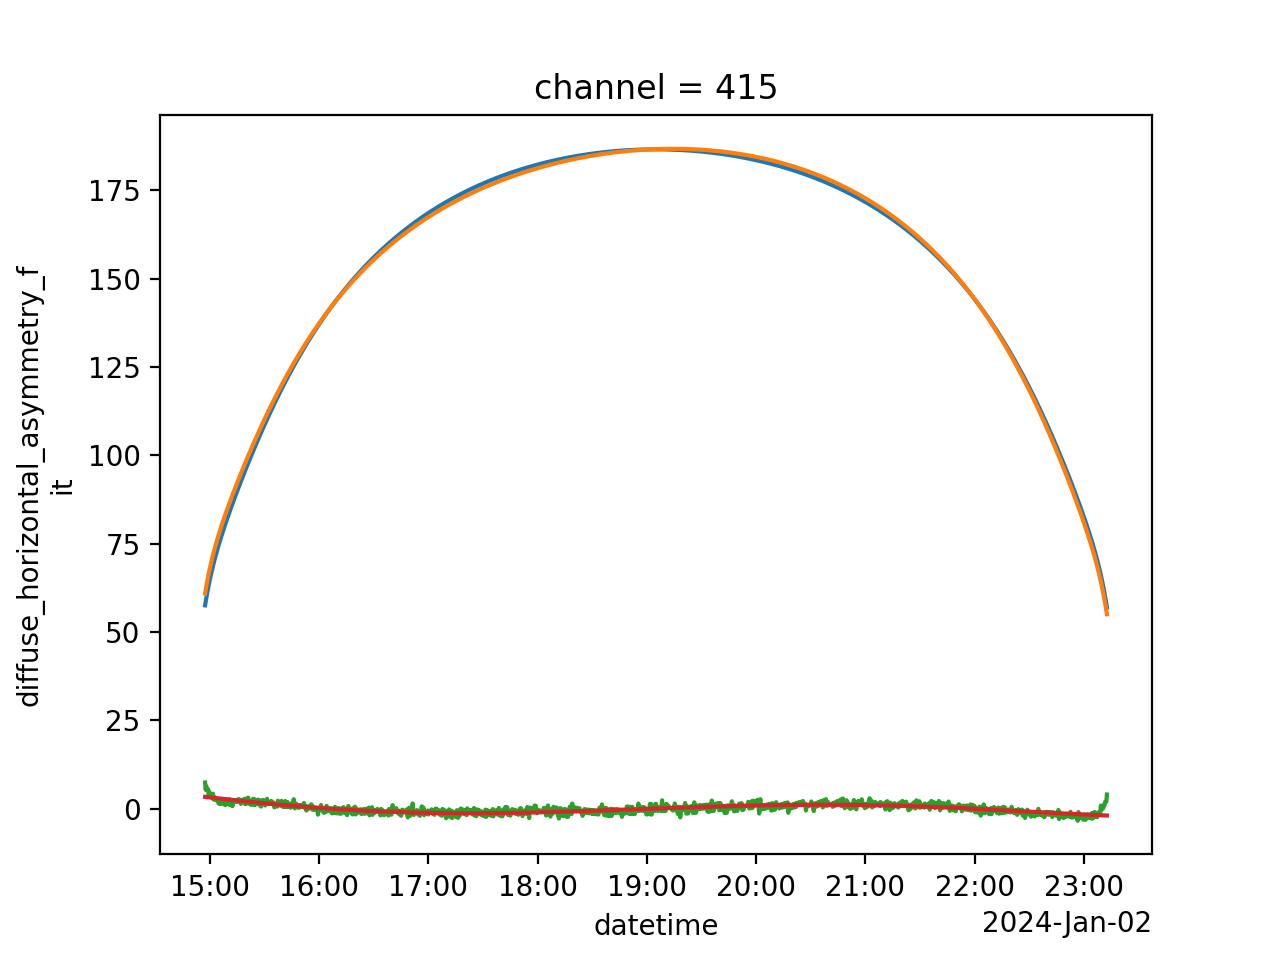

In [617]:
f,a = plt.subplots()
csel[f'{param}_clearsky_symmetric'].plot(ax = a)
csel[f'{param}_clearsky'].plot(ax = a)
csel.diffuse_horizontal_asymmetry.plot(ax = a)
csel.diffuse_horizontal_asymmetry_fit.plot(ax = a)

In [610]:
csel

<xarray.Dataset>
Dimensions:                                  (datetime: 1477, polynom_deg: 6)
Coordinates:
    channel                                  int64 415
  * datetime                                 (datetime) datetime64[ns] 2024-0...
  * polynom_deg                              (polynom_deg) int64 5 4 3 2 1 0
Data variables:
    diffuse_horizontal_clearsky_symmetric    (datetime) float32 57.56 ... 56.96
    diffuse_horizontal_clearsky              (datetime) float64 60.92 ... 55.05
    diffuse_horizontal_symmetry_fit          (datetime) float64 3.365 ... -1.903
    diffuse_horizontal_symmetry              (datetime) float32 7.441 ... 4.042
    diffuse_horizontal_asymmetry_fit_params  (polynom_deg) float64 5.082e-21 ...
    diffuse_horizontal_symmetry_fit_params   (polynom_deg) float64 nan ... 269.0
    direct_normal_clearsky_symmetric         (datetime) float32 -46.19 ... -5...
    direct_normal_clearsky                   (datetime) float64 25.31 ... -72.61
    direct_normal_symmetry_fit               (datetime) float64 71.5 ... -18.31
    direct_normal_symmetry                   (datetime) float32 174.8 ... 107.4
    direct_normal_asymmetry_fit_params       (polynom_deg) float64 1.37e-19 ....
    direct_normal_symmetry_fit_params        (polynom_deg) float64 nan ... 1....
Attributes:
    site:     tbl

In [603]:
list(csel[f'{param}_symmetry_fit_params'].dropna('polynom_deg').values)

[-0.13025980319911226,
 3.8603509311499278,
 -45.25997705512997,
 268.97731530064357]

In [594]:
param

'diffuse_horizontal'

Esteblishing connection
Fit result added with FitID: 1


In [435]:
coeff

array([-1.38993479e-19,  1.06624099e-14, -3.15969103e-10,  4.46869228e-06,
       -3.08674824e-02,  9.04077982e+01])

In [436]:
coeffsym

array([-7.28033906e-02,  9.32099993e-01, -6.78897869e+00,  5.36096913e+02])

In [320]:
clearsky

<xarray.Dataset>
Dimensions:                                (channel: 5, datetime: 1477)
Coordinates:
  * channel                                (channel) int64 415 500 670 870 1625
  * datetime                               (datetime) datetime64[ns] 2024-01-...
Data variables:
    diffuse_horizontal_clearsky_symmetric  (channel, datetime) float32 57.56 ...
    diffuse_horizontal_clearsky            (channel, datetime) float64 60.92 ...
    diffuse_horizontal_asymmetry_fit       (channel, datetime) float64 3.365 ...
    diffuse_horizontal_asymmetry           (channel, datetime) float32 7.441 ...
    direct_normal_clearsky_symmetric       (channel, datetime) float32 -46.19...
    direct_normal_clearsky                 (channel, datetime) float64 25.31 ...
    direct_normal_asymmetry_fit            (channel, datetime) float64 71.5 ....
    direct_normal_asymmetry                (channel, datetime) float32 174.8 ...

Text(0, 0.5, '$\\Delta$Irradiance (mV)')

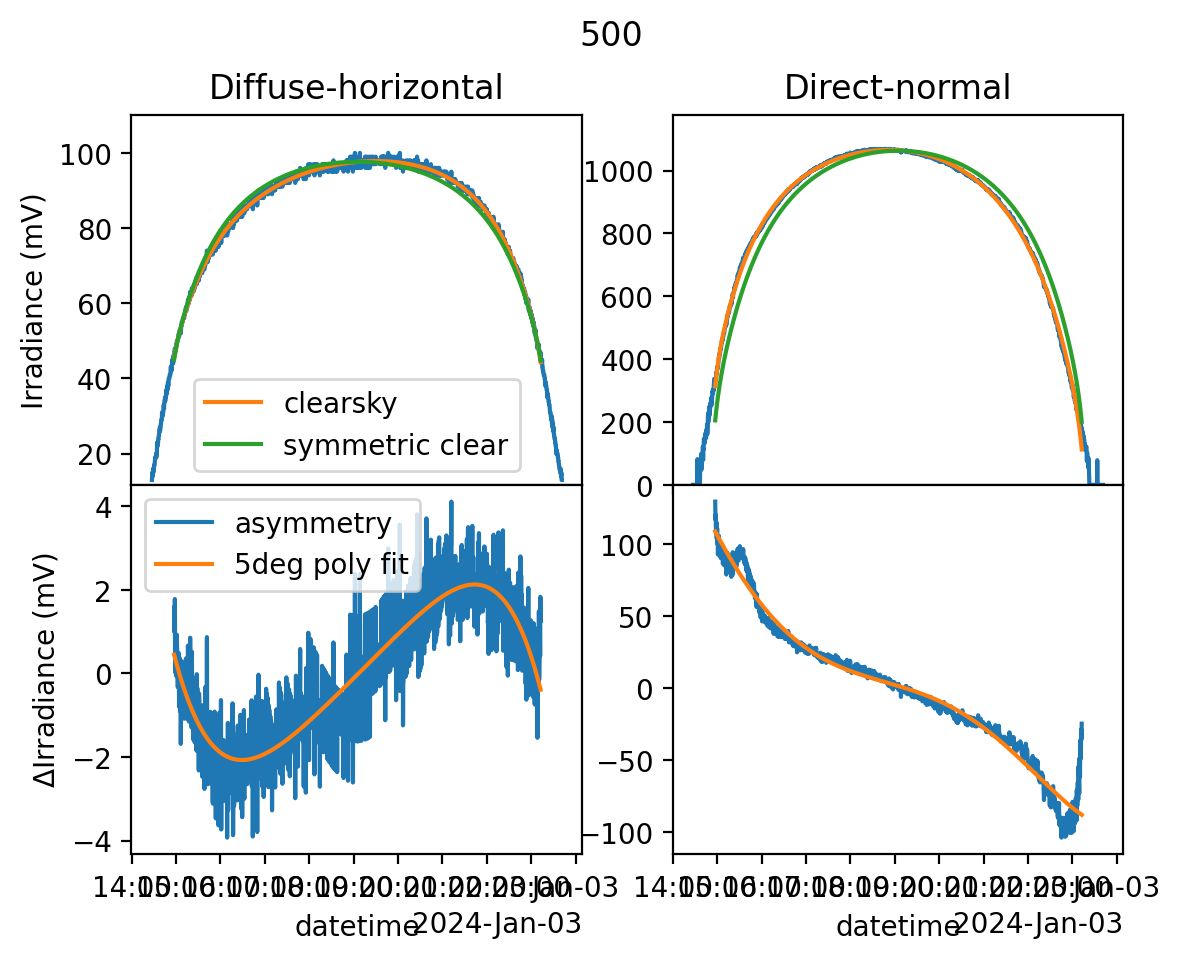

In [339]:
#######
### Plot clearsky result
channel = 500
f,aa = plt.subplots(2,2, sharex = True, gridspec_kw={'hspace': 0})
f.suptitle(f'{channel}')
###########################3
a = aa[0][0]
diffuse = ds.diffuse_horizontal.sel(channel = channel)
diffuse.plot(ax = a)
clearsky.diffuse_horizontal_clearsky.sel(channel = channel).plot(ax = a, label = 'clearsky')
clearsky.diffuse_horizontal_clearsky_symmetric.sel(channel = channel).plot(ax = a, label = 'symmetric clear')
a.set_ylim(diffuse.min()*0.9,diffuse.max()*1.1)
a.legend()

a = aa[1][0]
clearsky.diffuse_horizontal_asymmetry.sel(channel = channel).plot(ax = a, label = 'asymmetry')
clearsky.diffuse_horizontal_asymmetry_fit.sel(channel = channel).plot(ax = a, label = '5deg poly fit')
a.legend()


##############################
a = aa[0][1]
diffuse = ds.direct_normal.sel(channel = channel)
diffuse.plot(ax = a)
clearsky.direct_normal_clearsky.sel(channel = channel).plot(ax = a, label = 'clearsky')
clearsky.direct_normal_clearsky_symmetric.sel(channel = channel).plot(ax = a, label = 'symmetric clear')
a.set_ylim(diffuse.min()*0.9,diffuse.max()*1.1)
# a.legend()

a = aa[1][1]
clearsky.direct_normal_asymmetry.sel(channel = channel).plot(ax = a, label = 'asymmetry')
clearsky.direct_normal_asymmetry_fit.sel(channel = channel).plot(ax = a, label = '5deg poly fit')
# a.legend()



#################################
for a in aa.flatten():
    a.set_title('')
    a.set_ylabel('')

aa[0][1].set_title('Direct-normal')
aa[0][0].set_title('Diffuse-horizontal')

aa[0][0].set_ylabel('Irradiance (mV)')
aa[1][0].set_ylabel('$\\Delta$ Irradiance (mV)')

In [309]:
amlim = 10
airmass = ds.sun_position.sel(sun_params = 'airmass')
diffuse = ds.direct_normal.sel(channel = 500).dropna('datetime')
diffuse = diffuse.where(airmass < amlim, drop = True).where(airmass > 1, drop = True)
airmass = airmass.where(~diffuse.isnull())

amlim = 10
diffusesel = diffuse.where(airmass < amlim, drop = True).where(airmass > 1, drop = True)
airmasssel = airmass.where(~diffusesel.isnull(), drop = True)

In [310]:
degree = 3 # degree of polynomial fit; 2 might also be enough
coeff = np.polyfit(airmasssel.values, diffusesel.values, degree)
diffpred = np.poly1d(coeff)(airmass)
# aa[1].plot(airmass,diffuse - diffpred, label = degree)

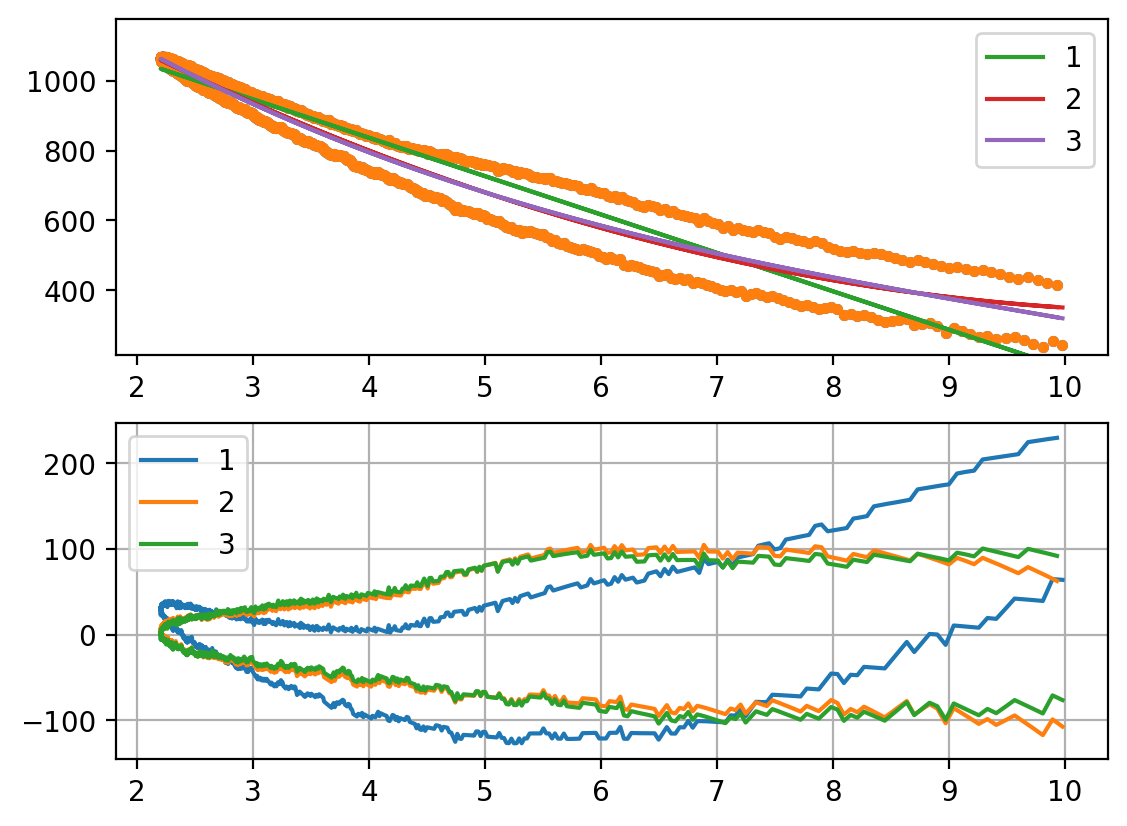

In [312]:
%matplotlib inline
f,aa = plt.subplots(2)
a = aa[0]
# ds.direct_normal.plot.line(x = 'datetime', ax = a)
# ds.direct_normal.sel(channel = 870).plot.line(x = 'datetime', ax = a)

a.plot(airmass,diffuse, marker = '.', ls = '')
a.plot(airmasssel, diffusesel, marker = '.', ls = '')
for degree in [1,2,3]:
    coeff = np.polyfit(airmasssel.values, diffusesel.values, degree)
    
    diffpred = np.poly1d(coeff)(airmass)
    
    aa[0].plot(airmass, diffpred, label = degree)

    aa[1].plot(airmass,diffuse - diffpred, label = degree)
# a.set_xlim(1,20)
a.set_ylim(diffuse.min()*0.9,diffuse.max()*1.1)
a.legend()

a = aa[1]
lim = 5
# a.set_ylim(-lim, lim)
a.grid()
a.legend()


In [313]:
data = diffuse - diffpred

dtfirst = data.datetime.values[0]
x = (data.datetime - dtfirst)/pd.to_timedelta(1,'s')

In [314]:
coeff = np.polyfit(x, data, 5)
datapred = np.poly1d(coeff)(x)
clearsky = xr.DataArray(diffpred + datapred, coords = {'datetime': data.datetime})

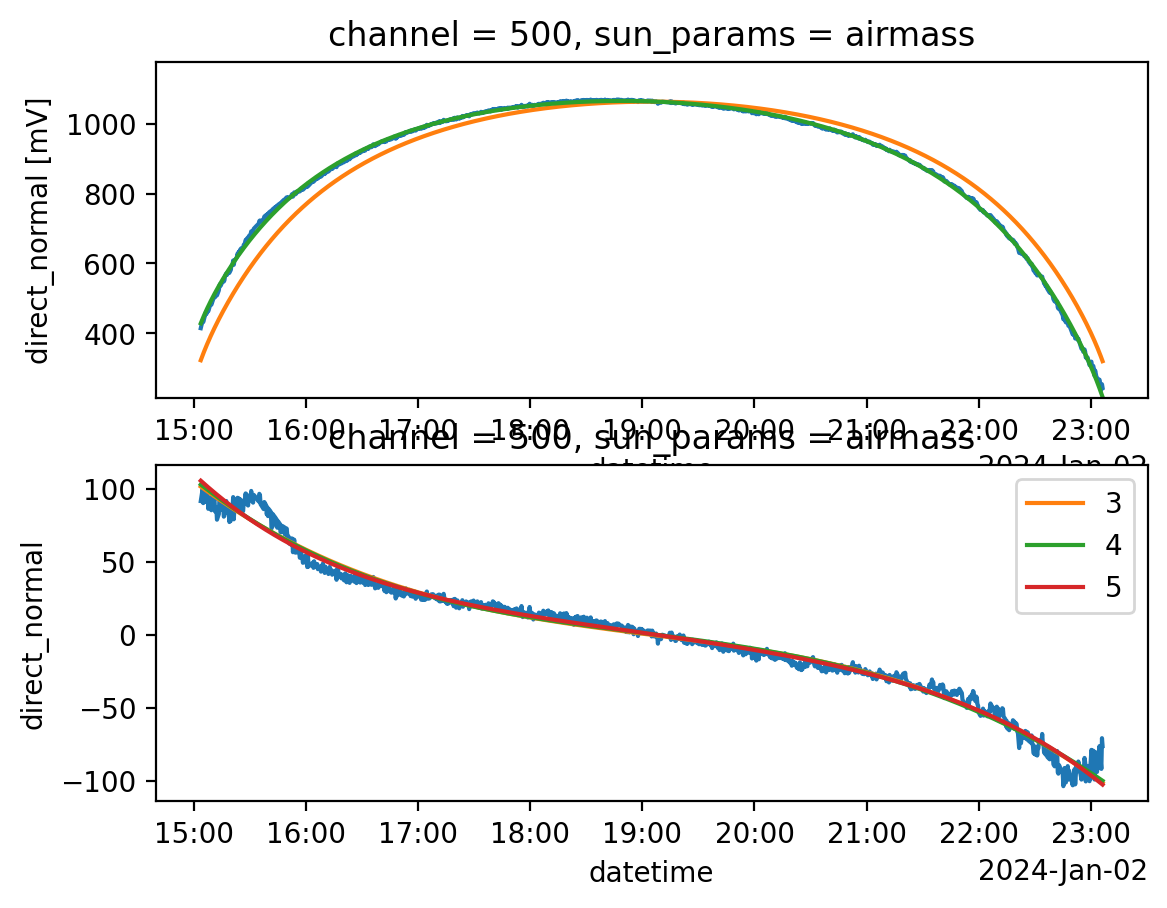

In [315]:
f,aa = plt.subplots(2)
a = aa[0]
diffuse.plot(ax = a)
a.plot(diffuse.datetime, diffpred)
a.set_ylim(diffuse.min()*0.9,diffuse.max()*1.1)

a = aa[1]
(data).plot(ax = a)
for degree in [3,4,5]:
    coeff = np.polyfit(x, data, degree)
    datapred = np.poly1d(coeff)(x)
    
    a.plot(data.datetime, datapred, label = degree)

a.legend()

a = aa[0]
a.plot(diffuse.datetime, diffpred + datapred)

### Diffuse development

In [ ]:
amlim = 10
airmass = ds.sun_position.sel(sun_params = 'airmass')
diffuse = ds.diffuse_horizontal.sel(channel = 500).dropna('datetime')
diffuse = diffuse.where(airmass < amlim, drop = True).where(airmass > 1, drop = True)
airmass = airmass.where(~diffuse.isnull())

amlim = 10
diffusesel = diffuse.where(airmass < amlim, drop = True).where(airmass > 1, drop = True)
airmasssel = airmass.where(~diffusesel.isnull(), drop = True)

In [ ]:
degree = 3 # degree of polynomial fit; 2 might also be enough
coeff = np.polyfit(airmasssel.values, diffusesel.values, degree)
diffpred = np.poly1d(coeff)(airmass)
# aa[1].plot(airmass,diffuse - diffpred, label = degree)

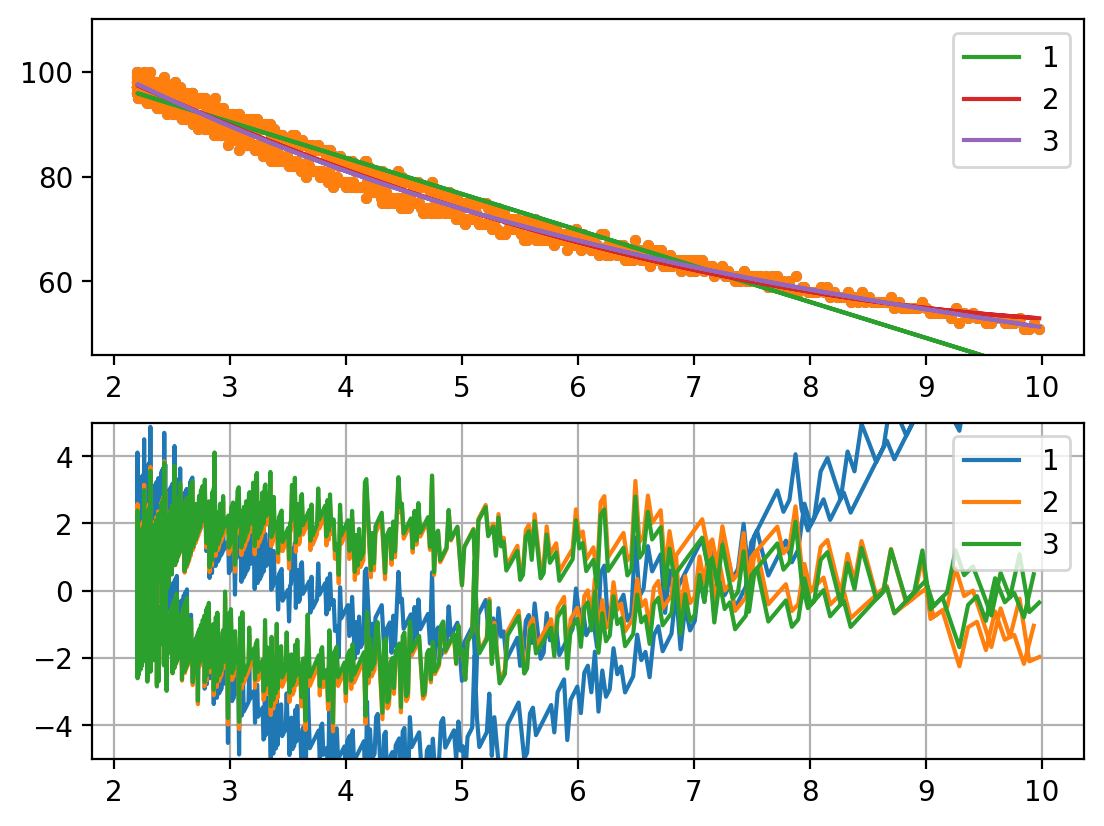

In [224]:
%matplotlib inline
f,aa = plt.subplots(2)
a = aa[0]
# ds.direct_normal.plot.line(x = 'datetime', ax = a)
# ds.direct_normal.sel(channel = 870).plot.line(x = 'datetime', ax = a)

a.plot(airmass,diffuse, marker = '.', ls = '')
a.plot(airmasssel, diffusesel, marker = '.', ls = '')
for degree in [1,2,3]:
    coeff = np.polyfit(airmasssel.values, diffusesel.values, degree)
    
    diffpred = np.poly1d(coeff)(airmass)
    
    aa[0].plot(airmass, diffpred, label = degree)

    aa[1].plot(airmass,diffuse - diffpred, label = degree)
# a.set_xlim(1,20)
a.set_ylim(diffuse.min()*0.9,diffuse.max()*1.1)
a.legend()

a = aa[1]
lim = 5
a.set_ylim(-lim, lim)
a.grid()
a.legend()


In [ ]:
data = diffuse - diffpred

dtfirst = data.datetime.values[0]
x = (data.datetime - dtfirst)/pd.to_timedelta(1,'s')

In [254]:
coeff = np.polyfit(x, data, 5)
datapred = np.poly1d(coeff)(x)
clearsky = xr.DataArray(diffpred + datapred, coords = {'datetime': data.datetime})

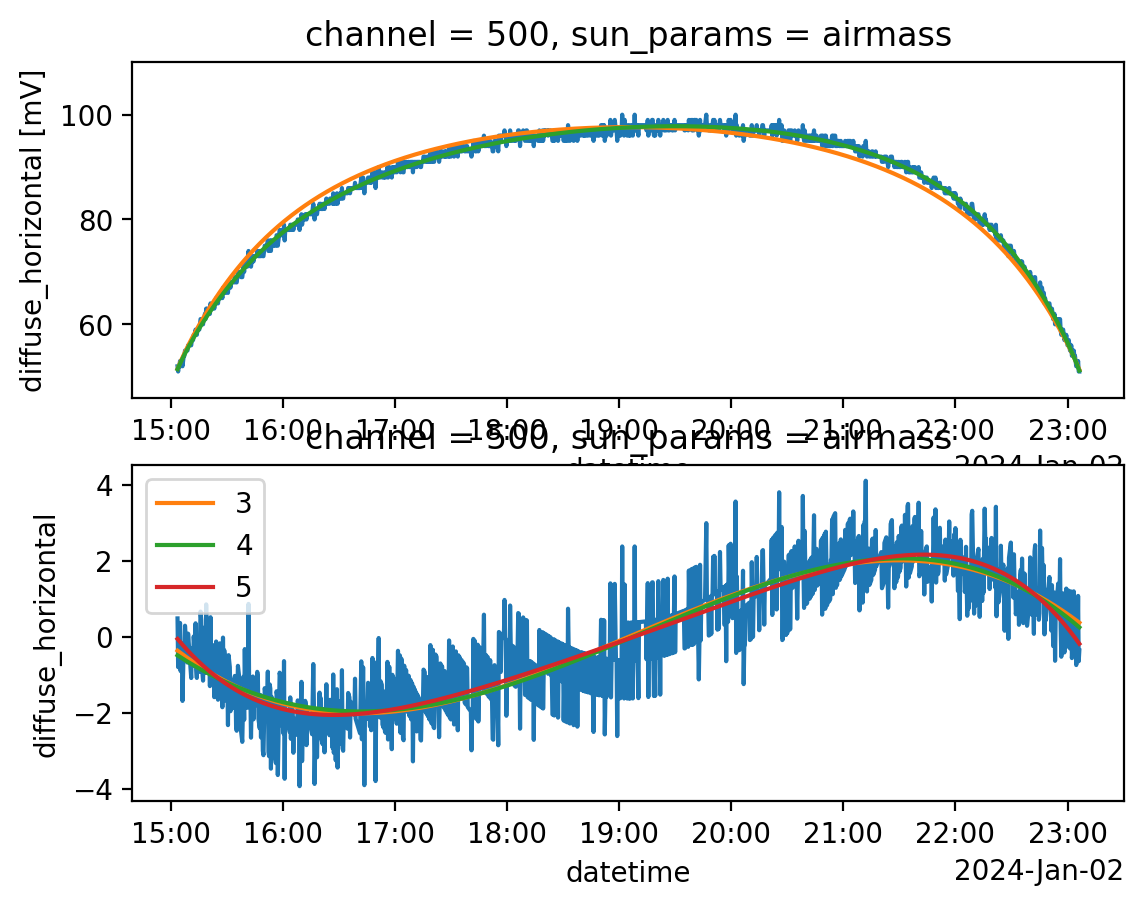

In [251]:
f,aa = plt.subplots(2)
a = aa[0]
diffuse.plot(ax = a)
a.plot(diffuse.datetime, diffpred)
a.set_ylim(diffuse.min()*0.9,diffuse.max()*1.1)

a = aa[1]
(data).plot(ax = a)
for degree in [3,4,5]:
    coeff = np.polyfit(x, data, degree)
    datapred = np.poly1d(coeff)(x)
    
    a.plot(data.datetime, datapred, label = degree)

a.legend()

a = aa[0]
a.plot(diffuse.datetime, diffpred + datapred)

### some other wavelength

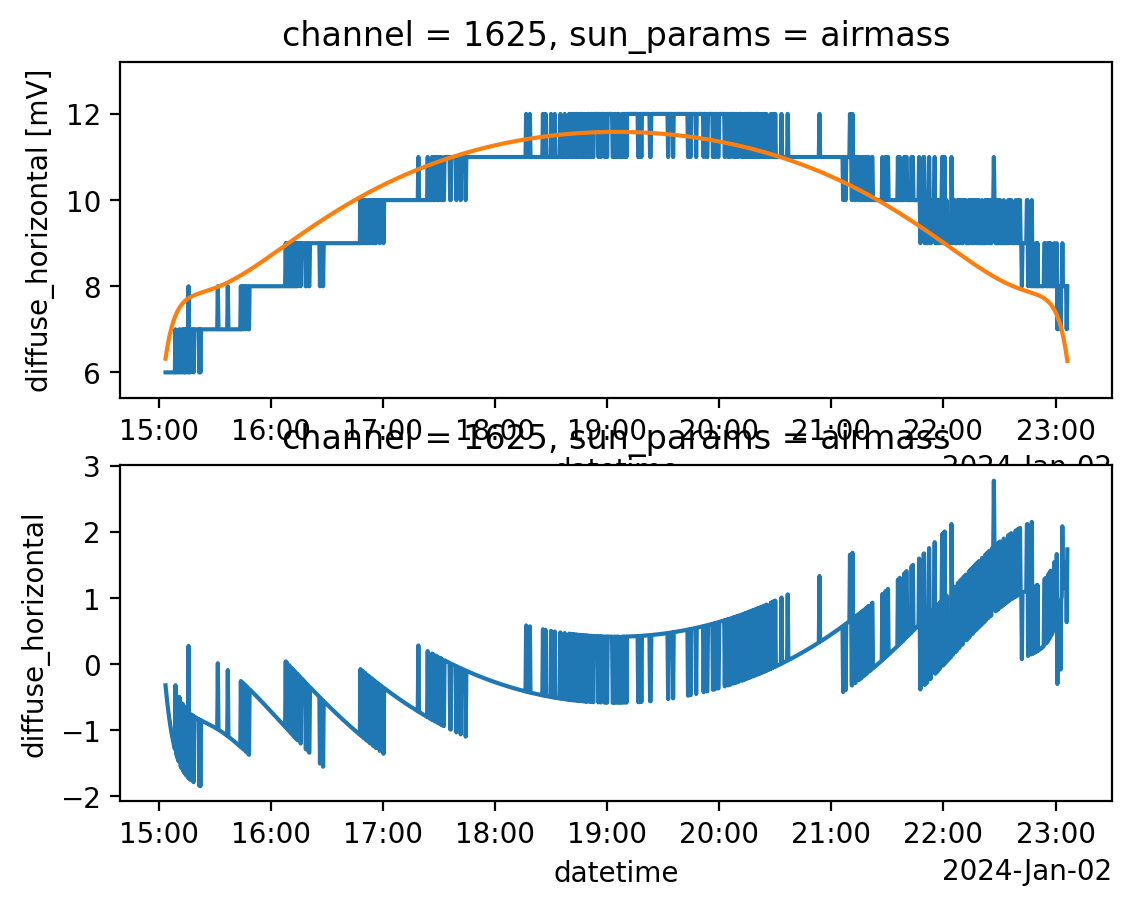

In [217]:
f,aa = plt.subplots(2)
a = aa[0]
diffuse.plot(ax = a)
a.plot(diffuse.datetime, diffpred)
a.set_ylim(diffuse.min()*0.9,diffuse.max()*1.1)

a = aa[1]
(diffuse - diffpred).plot(ax = a)


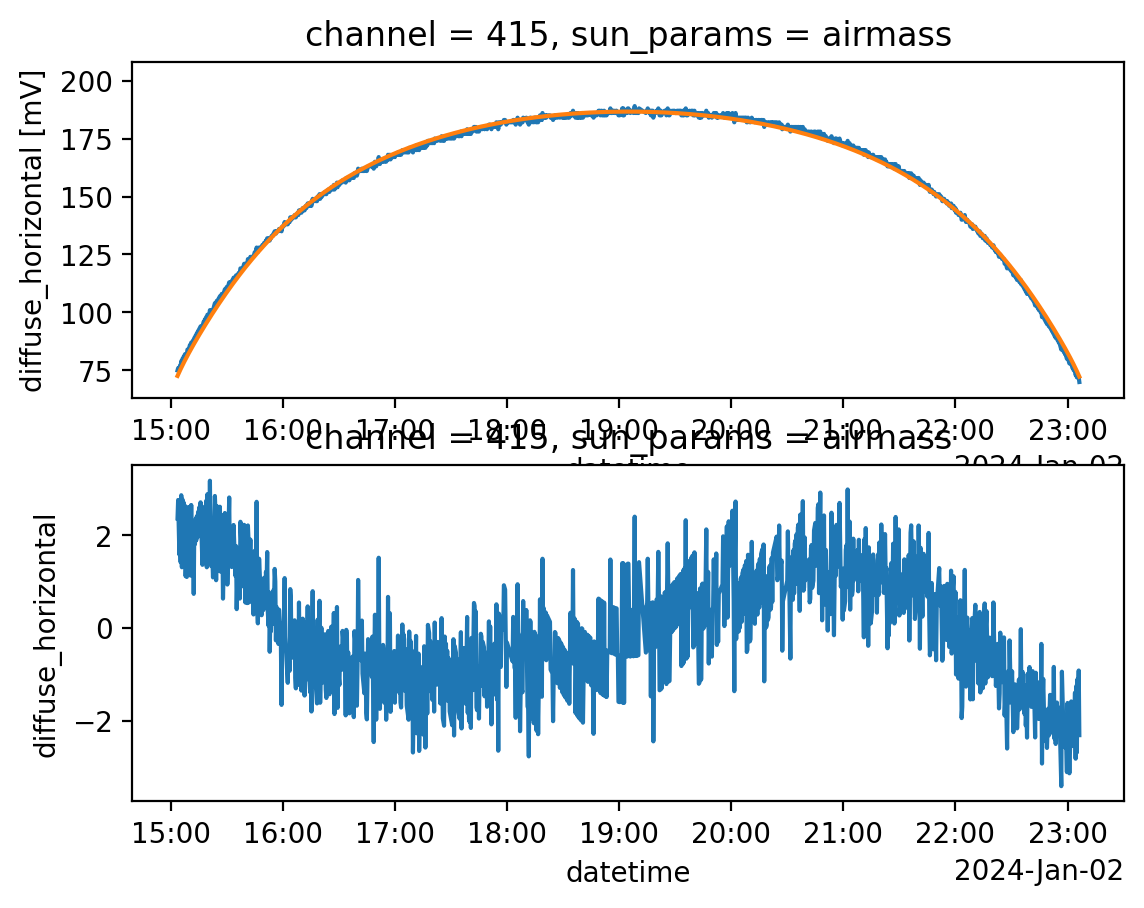

In [213]:
f,aa = plt.subplots(2)
a = aa[0]
diffuse.plot(ax = a)
a.plot(diffuse.datetime, diffpred)
a.set_ylim(diffuse.min()*0.9,diffuse.max()*1.1)

a = aa[1]
(diffuse - diffpred).plot(ax = a)


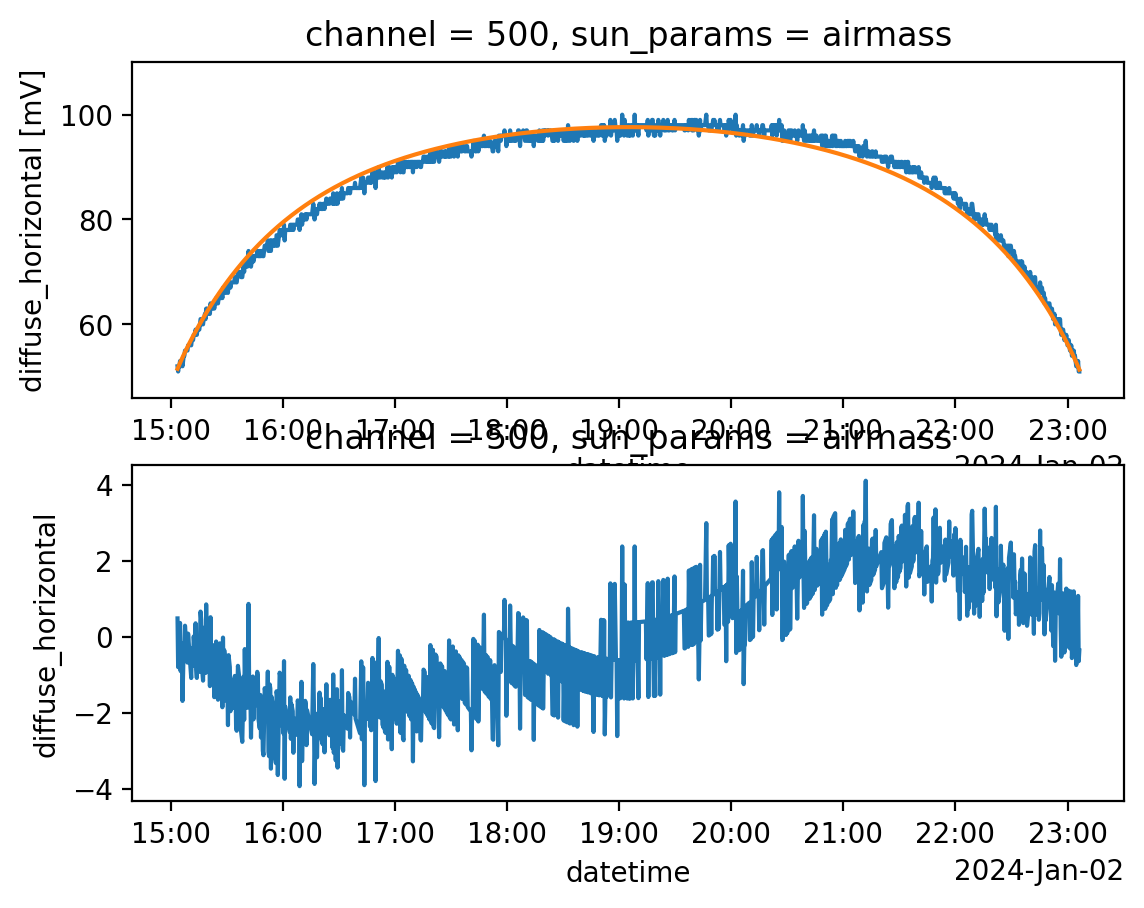

In [209]:
f,aa = plt.subplots(2)
a = aa[0]
diffuse.plot(ax = a)
a.plot(diffuse.datetime, diffpred)
a.set_ylim(diffuse.min()*0.9,diffuse.max()*1.1)

a = aa[1]
(diffuse - diffpred).plot(ax = a)


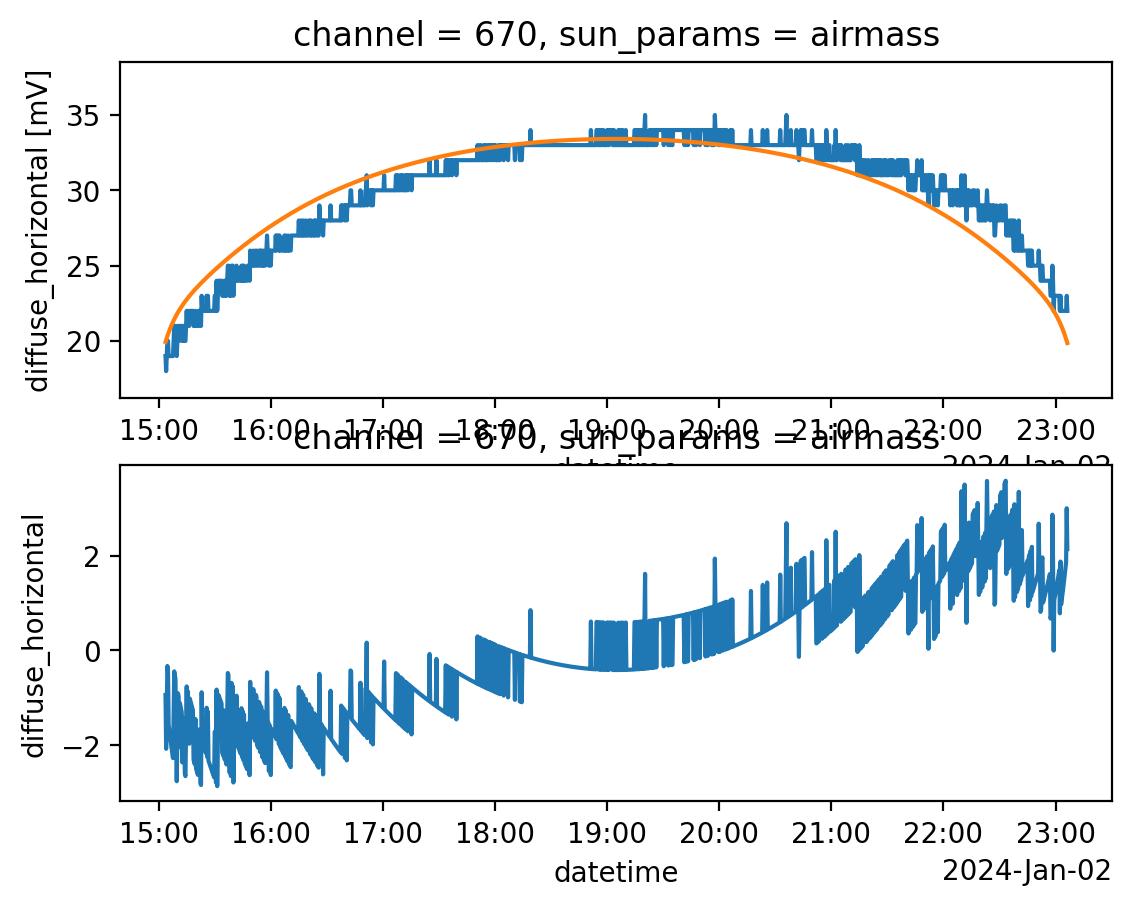

In [205]:
f,aa = plt.subplots(2)
a = aa[0]
diffuse.plot(ax = a)
a.plot(diffuse.datetime, diffpred)
a.set_ylim(diffuse.min()*0.9,diffuse.max()*1.1)

a = aa[1]
(diffuse - diffpred).plot(ax = a)


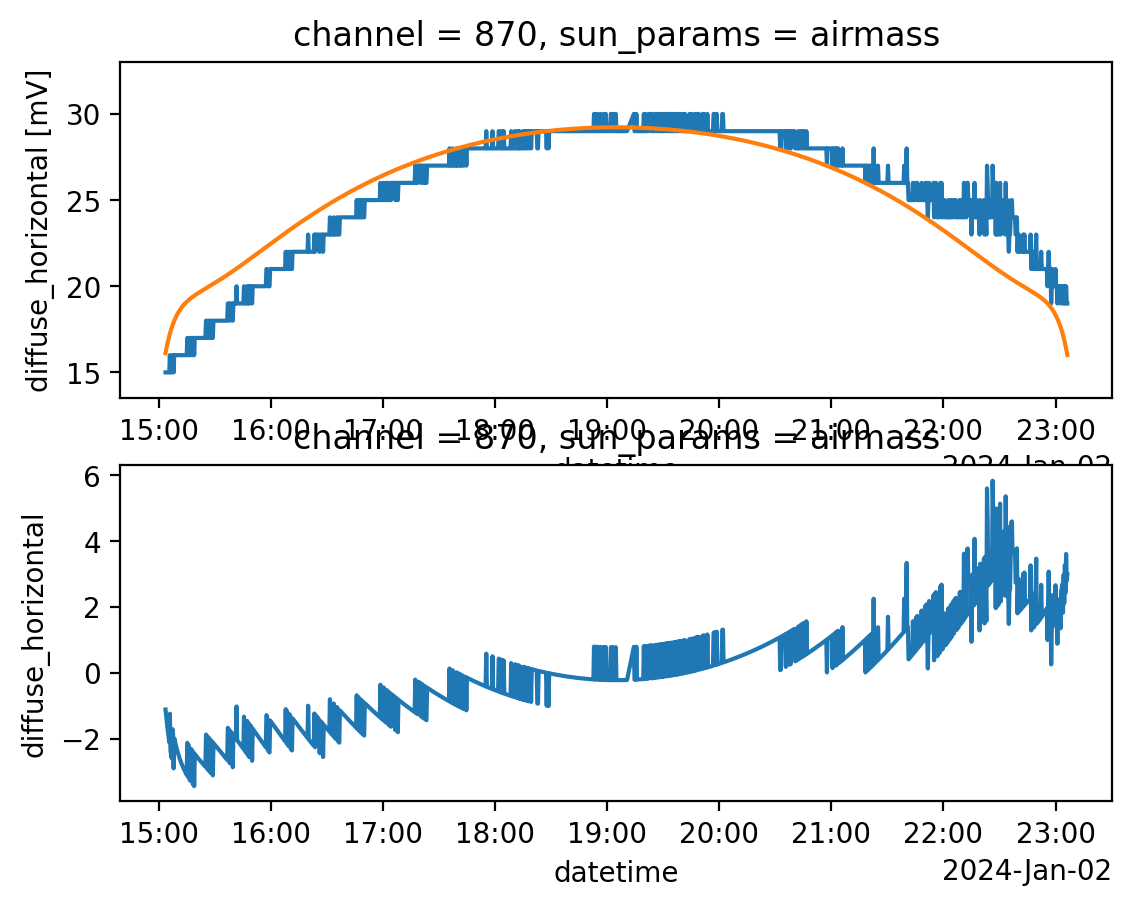

In [200]:
f,aa = plt.subplots(2)
a = aa[0]
diffuse.plot(ax = a)
a.plot(diffuse.datetime, diffpred)
a.set_ylim(diffuse.min()*0.9,diffuse.max()*1.1)

a = aa[1]
(diffuse - diffpred).plot(ax = a)


In [177]:
# Define the model function
def model_func(AM, a, b, c):
    return a * AM**b + AM*c

# Perform the curve fitting
p0 = [1,-1, -1]
params, covariance = scop.curve_fit(model_func, airmasssel.values, diffusesel.values, p0 = p0)
diffpred = model_func(airmass, *params)
params

array([262.17674195,  -0.35436897,  -4.79803   ])

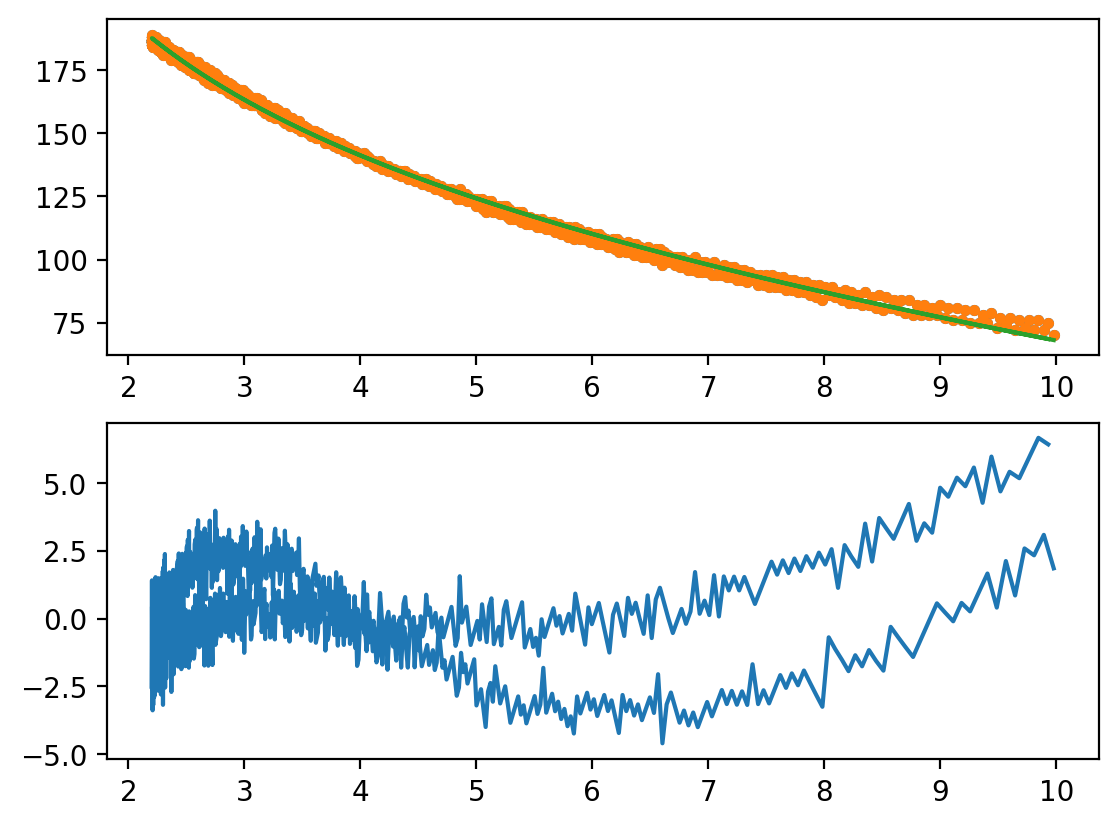

In [179]:
%matplotlib inline
f,aa = plt.subplots(2)
a = aa[0]
# ds.direct_normal.plot.line(x = 'datetime', ax = a)
# ds.direct_normal.sel(channel = 870).plot.line(x = 'datetime', ax = a)

a.plot(airmass,diffuse, marker = '.', ls = '')
a.plot(airmasssel, diffusesel, marker = '.', ls = '')
a.plot(airmass, diffpred)

a = aa[1]
a.plot(airmass, diffuse - diffpred)

# a.set_xlim(1,5)

In [138]:
# Define the model function
def model_func(AM, a, b):
    return a * AM ** b

# Perform the curve fitting
p0 = [1,1]
params, covariance = scop.curve_fit(model_func, airmasssel.values, diffusesel.values, p0 = p0)

In [116]:
params

array([269.87975059,  -0.45900605])

In [114]:
diffpred = model_func(airmass, *params)

(1.0, 5.0)

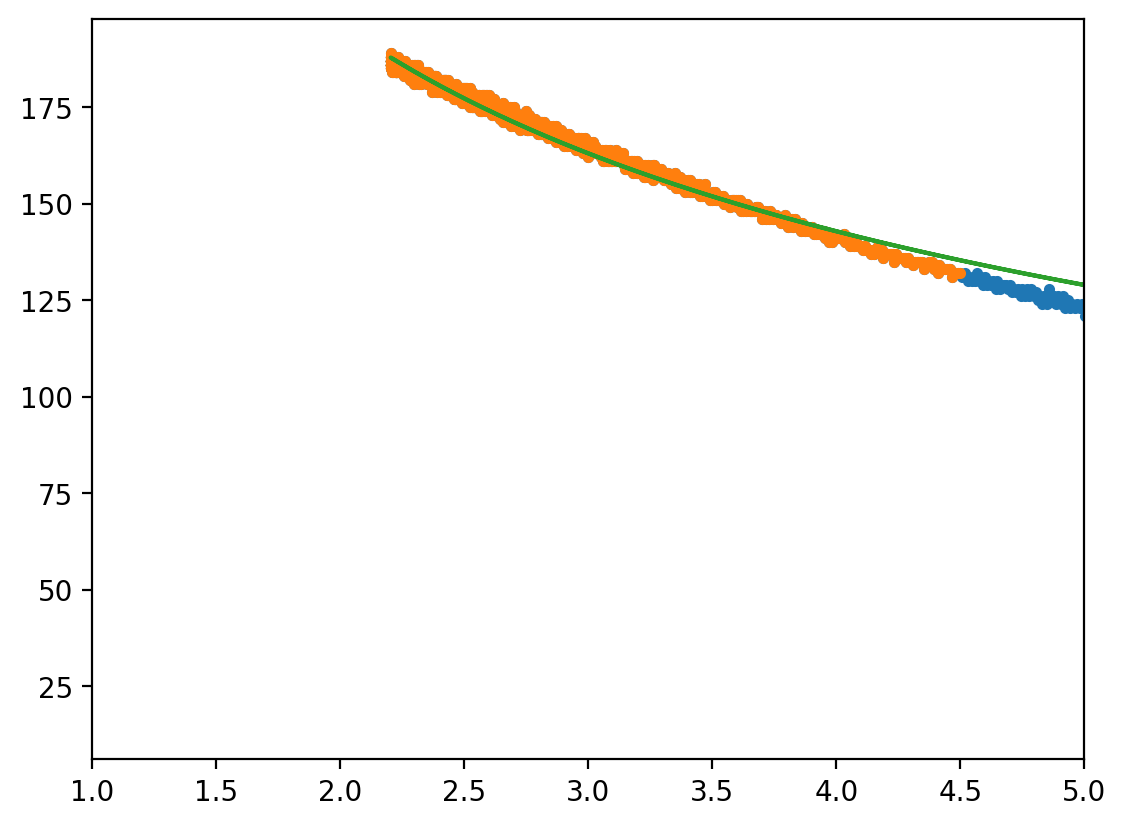

In [115]:
%matplotlib inline
f,a = plt.subplots()
# ds.direct_normal.plot.line(x = 'datetime', ax = a)
# ds.direct_normal.sel(channel = 870).plot.line(x = 'datetime', ax = a)

a.plot(airmass,diffuse, marker = '.', ls = '')
a.plot(airmasssel, diffusesel, marker = '.', ls = '')
a.plot(airmass, diffpred)
a.set_xlim(1,5)

In [100]:
params

array([1., 1.])

In [ ]:
# Extracting the parameters a and b
a, b = params

print(f"Fitted parameters: a = {a}, b = {b}")

# Generate fitted values for plotting
AM_fit = np.linspace(airmass.min(), airmass.max(), 100)
D_fit = model_func(AM_fit, a, b)

Fitted parameters: a = 1.0, b = 1.0


/tmp/ipykernel_1648813/156163470.py:6: OptimizeWarning: Covariance of the parameters could not be estimated
  params, covariance = scop.curve_fit(model_func, airmasssel, diffusesel)


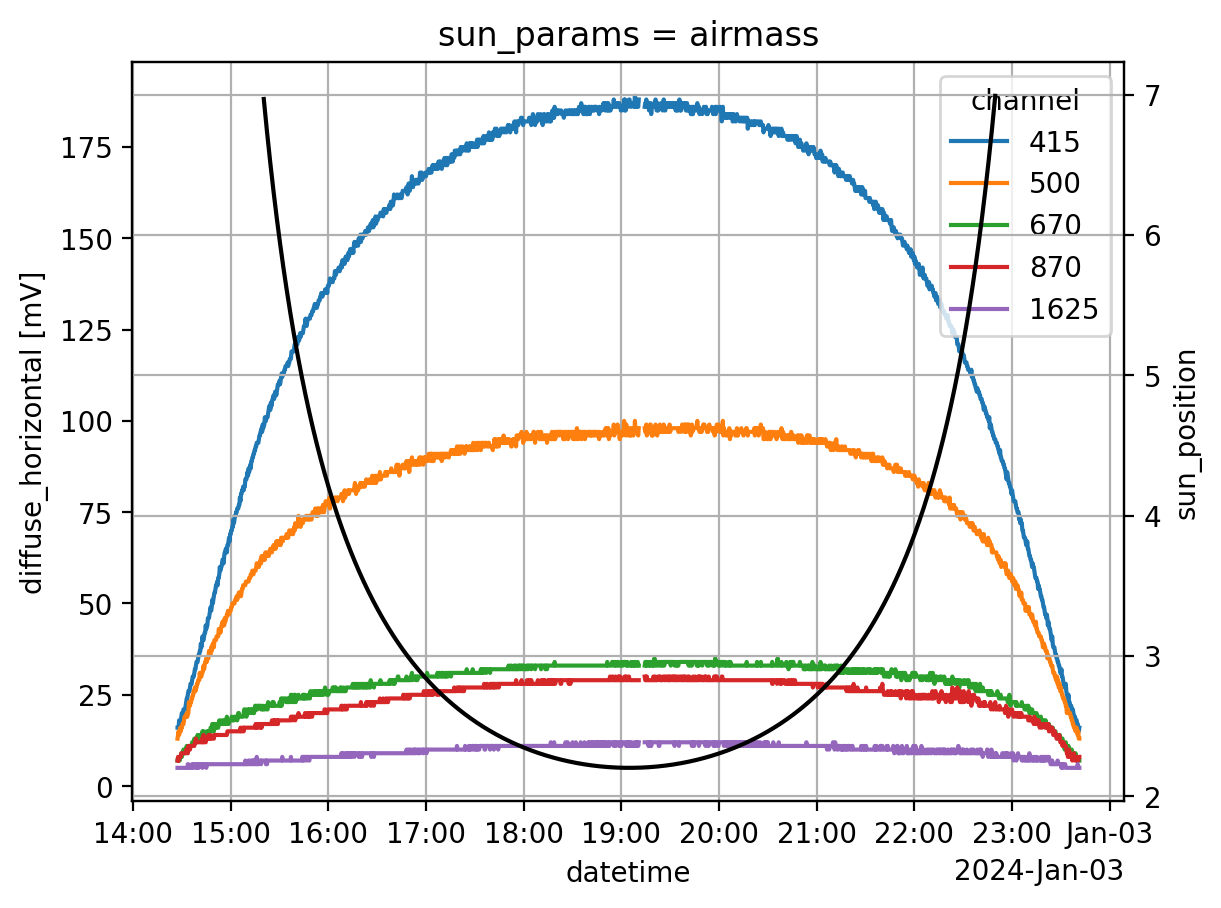

In [62]:
%matplotlib inline
f,a = plt.subplots()
ds.diffuse_horizontal.plot.line(x = 'datetime', ax = a)
a.grid(axis = 'x')
at = a.twinx()
am = ds.sun_position.sel(sun_params = 'airmass')
amlim = 7
am.where(am < amlim).where(am > 0).plot(ax = at, color = 'black')
at.grid()

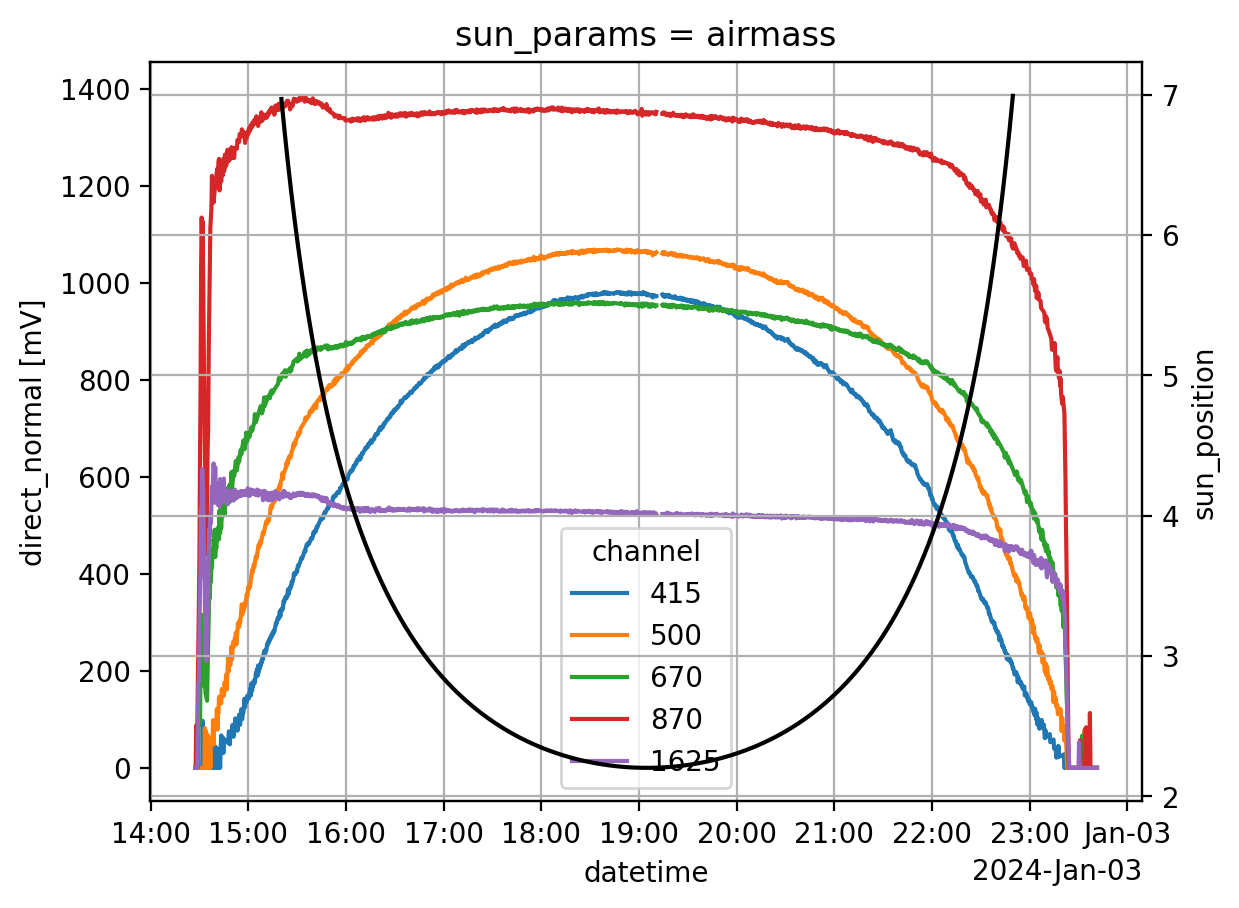

In [63]:
%matplotlib inline
f,a = plt.subplots()
ds.direct_normal.plot.line(x = 'datetime', ax = a)
a.grid(axis = 'x')
at = a.twinx()
am = ds.sun_position.sel(sun_params = 'airmass')
amlim = 7
am.where(am < amlim).where(am > 0).plot(ax = at, color = 'black')
at.grid()

(0.0, 12.0)

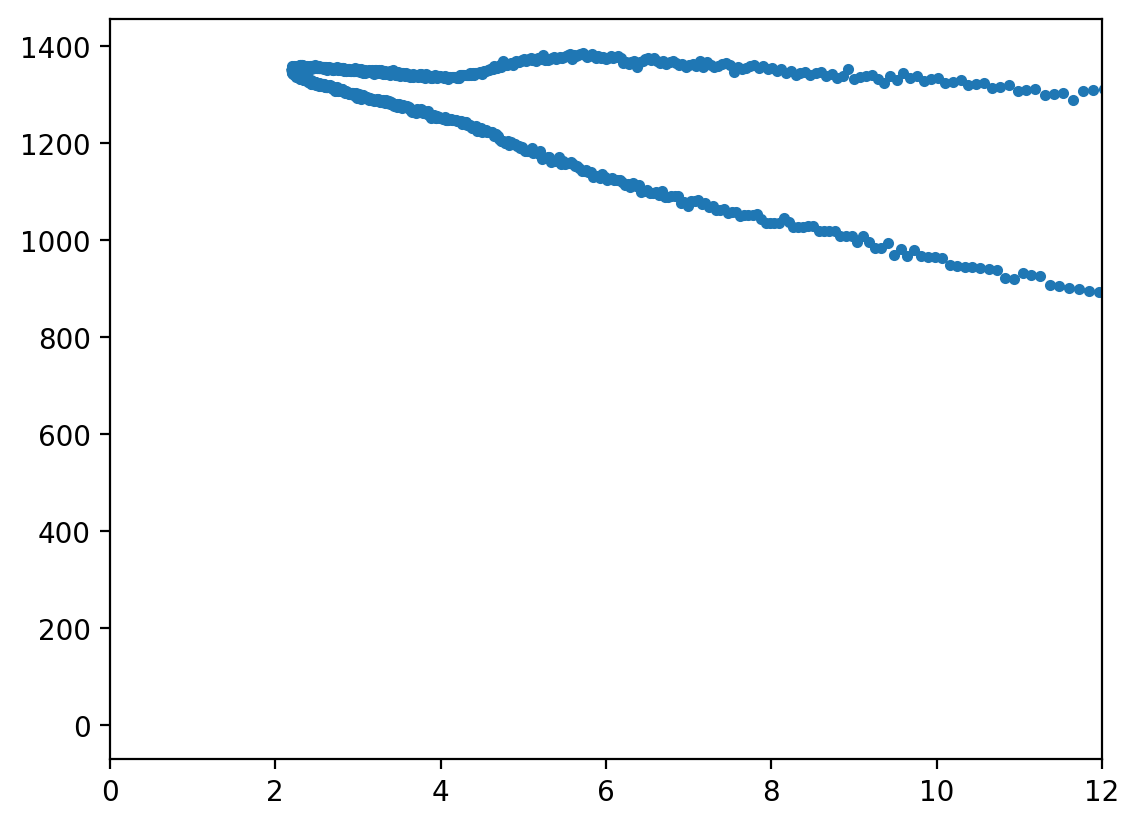

In [40]:
%matplotlib inline
f,a = plt.subplots()
# ds.direct_normal.plot.line(x = 'datetime', ax = a)
# ds.direct_normal.sel(channel = 870).plot.line(x = 'datetime', ax = a)

a.plot(ds.sun_position.sel(sun_params = 'airmass'), ds.direct_normal.sel(channel = 870), marker = '.', ls = '')
a.set_xlim(0,12)

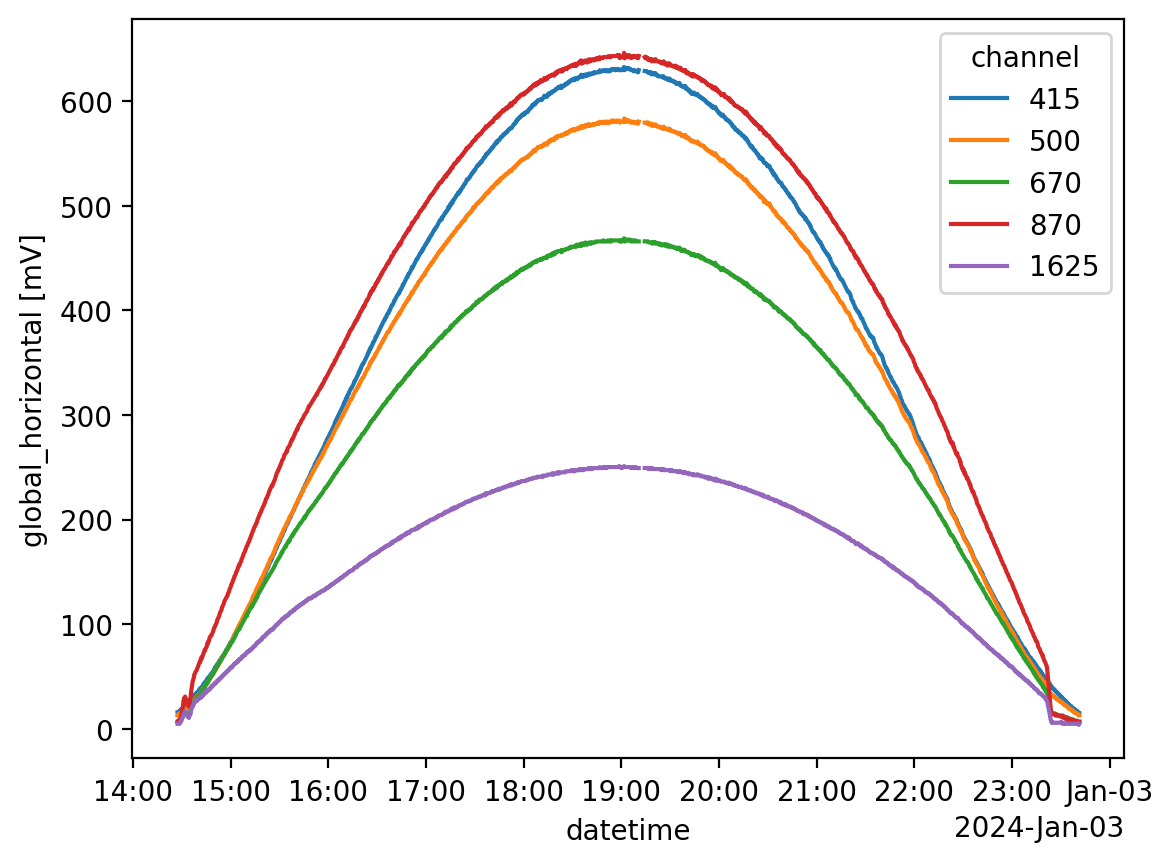

In [29]:
%matplotlib inline
f,a = plt.subplots()
ds.global_horizontal.plot.line(x = 'datetime', ax = a)


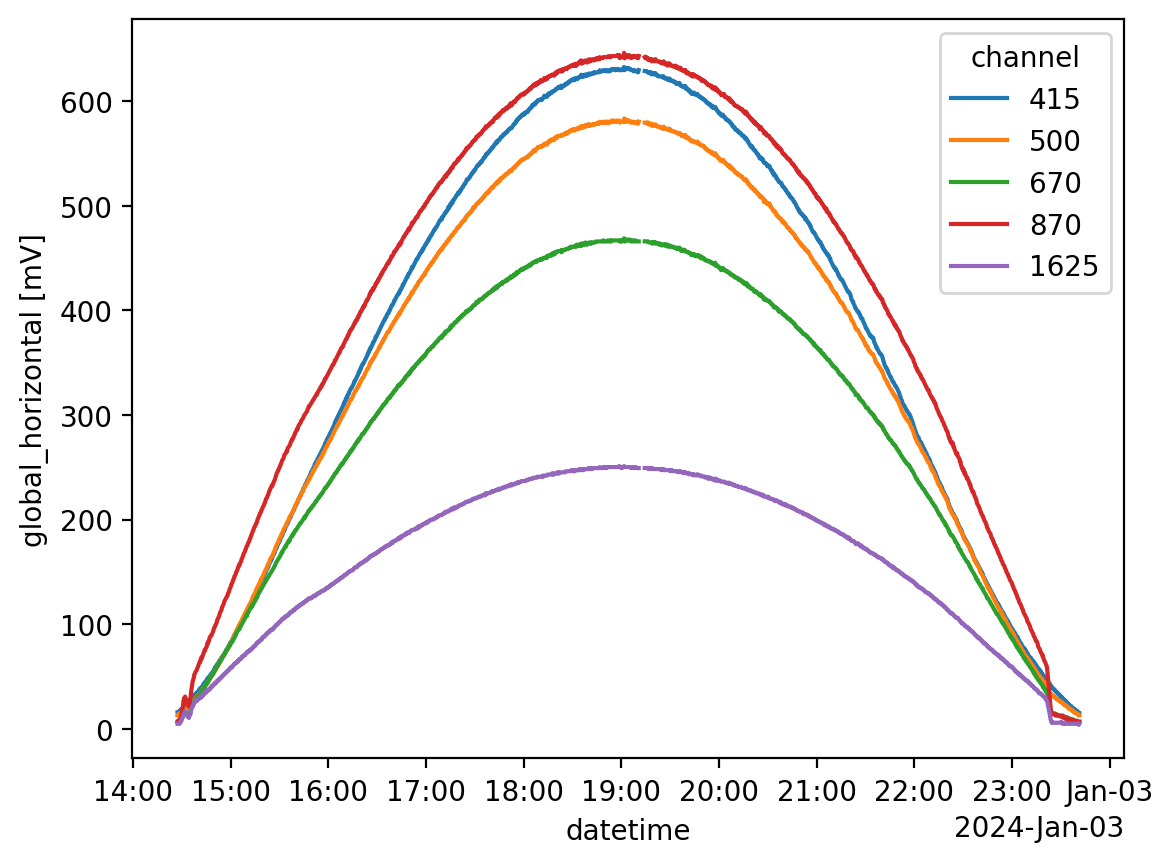

In [29]:
%matplotlib inline
f,a = plt.subplots()
ds.global_horizontal.plot.line(x = 'datetime', ax = a)


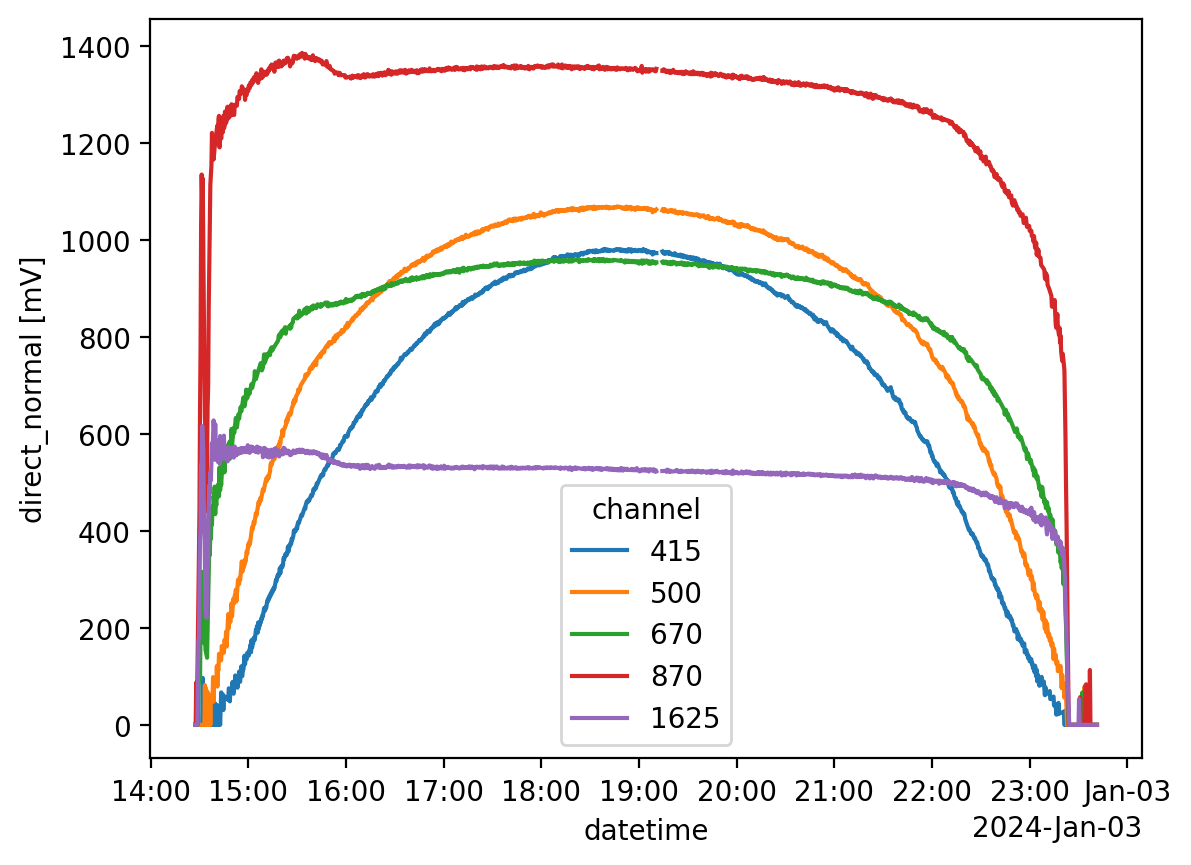

In [31]:
%matplotlib inline
f,a = plt.subplots()
ds.direct_normal.plot.line(x = 'datetime', ax = a)


## aod3

In [5]:
def open_aod(p2fsrf='/export/htelg/data/grad/surfrad/aod_3/3.0/tbl/'):
    p2fsrf = pl.Path(p2fsrf)
    fldlist = list(p2fsrf.glob('*'))
    fldlist.sort()
    files = [list(p.glob('*')) for p in fldlist[-2:]]
    files = [i for sl in files for i in sl]

    df = pd.DataFrame(files, columns = ['p2aod',])
    
    df['datetime'] =df.apply(lambda row: pd.to_datetime(row.p2aod.name.split('.')[0].split('_')[-1]), axis = 1)
    
    tuncbefore =  pd.Timestamp.now() - pd.to_timedelta(10, 'd')
    
    df  = df[df.datetime > tuncbefore].copy()
    
    df['pred'] = df.apply(lambda row: pd.to_datetime(row.p2aod.name.split('.')[1].split('_')[-1]) if len(row.p2aod.name.split('.')) == 3 else pd.Timestamp.now(), axis = 1)
    
    df = df.loc[df.groupby(df.datetime).pred.idxmax()]    
    ds = xr.open_mfdataset(df.p2aod)
    return ds

In [6]:
ds = open_aod()

ValueError: Cannot set a DataFrame with multiple columns to the single column pred

In [ ]:
%matplotlib widget
f,a = plt.subplots()
ds.od_total.sel(channel = [int(c) for c in ds.channel if c != 940]).where(ds.cloudmask_michalsky == 0).plot.line(x = 'datetime',ls = '', marker = '.', ax = a)
# ds.od_rayleigh.sel(channel = [int(c) for c in ds.channel if c != 940]).where(ds.cloudmask_michalsky == 0).plot.line(x = 'datetime',ls = '', marker = '.', ax = a)

In [ ]:
%matplotlib widget
f, a = plt.subplots()
ds.transmission.sel(
    channel=[int(c) for c in ds.channel if c != 940]
).where(
    ds.cloudmask_michalsky == 0
).plot.line(x='datetime', ls='', marker='.', ax=a)

### usefull qc-plots

if clean day this graph whoul not have much area in it

(0.0, 12.0)

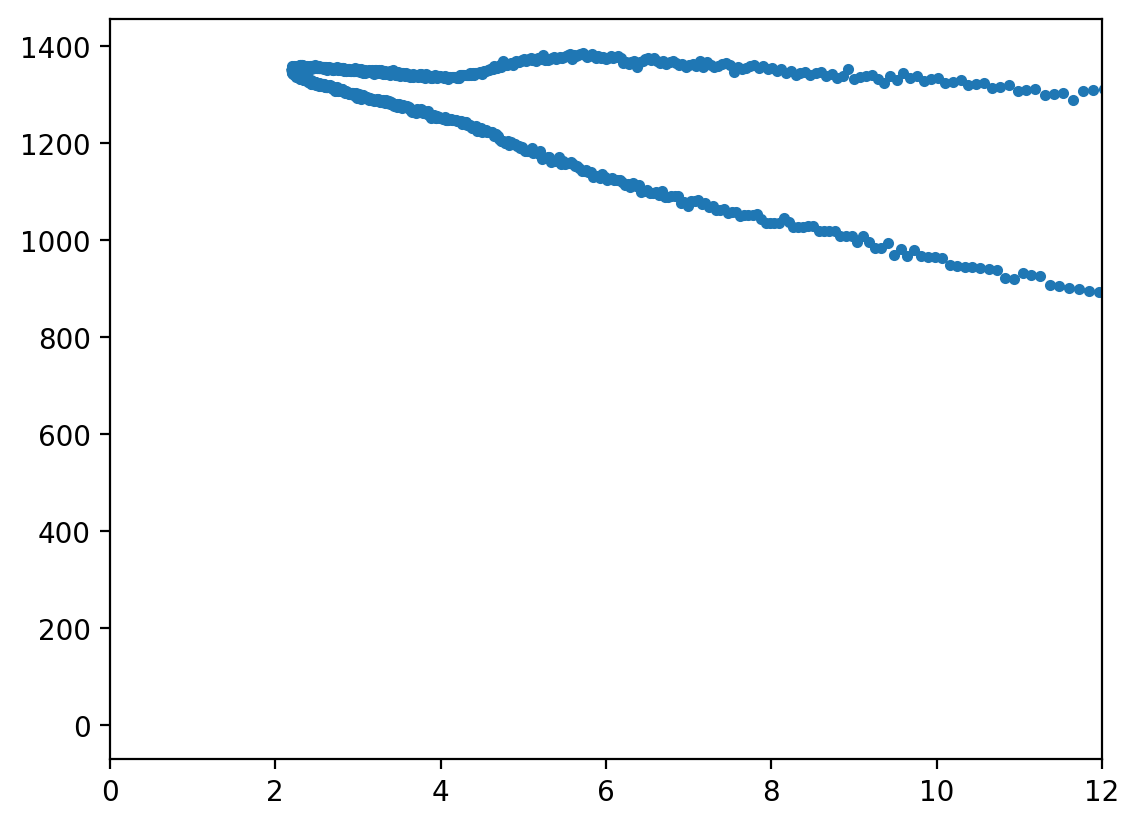

In [40]:
%matplotlib inline
f,a = plt.subplots()
# ds.direct_normal.plot.line(x = 'datetime', ax = a)
# ds.direct_normal.sel(channel = 870).plot.line(x = 'datetime', ax = a)

a.plot(ds.sun_position.sel(sun_params = 'airmass'), ds.direct_normal.sel(channel = 870), marker = '.', ls = '')
a.set_xlim(0,12)

# langleys

Goal: 
* plot langleys
* get an idea if the last 

In [7]:
import warnings
warnings.filterwarnings('ignore')
from qclib import by_date

## define load and plot functions

In [8]:
import pandas as pd
import xarray as xr

In [9]:
def path2date(path):
    return pd.to_datetime(path.name.split('_')[-3])
# path2date(pl.Path('srf_tbl_mfrsr_0660_20160825_langley_am.nc'))

In [10]:
def read_data(path2file):
    """
    function that takes the path to the file and returns an object that the 
    plot function can turn into a plot
    """
    ds = xr.open_dataset(path2file)
    return ds

def plot_nicely(cont):
    ds = cont.data.active_data['bla']
    dss = ds.isel(datetime=0)
    fitres = dss.airmass * dss.langley_fitres.sel(fit_results='slope') + \
        dss.langley_fitres.sel(fit_results='intercept')
    
    f, aaa = plt.subplots(4, 2, sharex=True,
                          gridspec_kw={'hspace': 0, 'wspace': 0},
                          height_ratios=[2, 1, 2, 1])
    aaa = aaa.flatten()
    
    def plot_set(ai, wl):
        # wl = 870
        aa = aaa[ai]
        a = aa[0]
        fitres.sel(wavelength = wl).plot(ax= a)
        dss.langleys.sel(wavelength = wl).plot(ax = a, ls = '', marker = '.')
        intercept = np.e**dss.langley_fitres.sel(fit_results = "intercept", wavelength = wl).values
        txt = (f'val.pt.: {dss.valid_points.values} ({dss.airmass.shape[0]})\n'
               f'slope:   {dss.langley_fitres.sel(fit_results = "slope", wavelength = wl).values:0.3f}\n'
               f'interc.: {intercept:0.0f}\n'
               f'stderr:  {dss.langley_fitres.sel(fit_results = "intercept_stderr", wavelength = wl).values:0.2e}')
        a.text(0.05, 0.05, txt, transform = a.transAxes, size = 'small')
        a.text(0.8, 0.8, f'{wl}', transform = a.transAxes, 
               # size = 'small',
                )
        a.set_ylabel('')
        ####
        a = aa[1]
        dss.langley_fit_residual.sel(wavelength = wl).plot(ax = a, ls = '', marker = '.')
        a.set_ylabel('')
            
        ###
        for a in aa:
            a.set_title('')
            if ai[0] % 2 == 1:
              
                a.yaxis.tick_right()
    
    plot_set([0,2], 415)
    plot_set([1,3], 500)
    plot_set([4,6], 870)
    plot_set([5,7], 1625)

    aaa[0].set_title(pd.to_datetime(ds.datetime.values[0]).date())
    
    return f,aaa, ds

def plot_data(data_object, a):
    wl = 500
    ds = data_object['bla']
    dss = ds.isel(datetime = 0)
    # dss.langleys.plot.line(x = 'airmass')
    fitres = dss.airmass * dss.langley_fitres.sel(fit_results = 'slope') + dss.langley_fitres.sel(fit_results = 'intercept')
    fitres.sel(wavelength = wl).plot(ax= a)
    dss.langleys.sel(wavelength = wl).plot(ax = a, ls = '', marker = '.')
    
    intercept = np.e**dss.langley_fitres.sel(fit_results = "intercept", wavelength = wl).values
    txt = (f'val.pt.: {dss.valid_points.values} ({dss.airmass.shape[0]})\n'
           f'slope:   {dss.langley_fitres.sel(fit_results = "slope", wavelength = wl).values:0.3f}\n'
           f'interc.: {intercept:0.0f}\n'
           f'stderr:  {dss.langley_fitres.sel(fit_results = "intercept_stderr", wavelength = wl).values:0.2e}')
    a.text(0.05, 0.05, txt, transform = a.transAxes, size = 'small')
    a.text(0.8, 0.8, f'{wl}', transform = a.transAxes, 
           # size = 'small',
            )
    a.set_ylabel('')

In [11]:
# f,aaa,ds = plot_nicely(cont)

# create instance

In [12]:
reload(by_date)
# reload(quicklooks)

<module 'qclib.by_date' from '/export/htelg/prog/qclib/qclib/by_date.py'>

In [13]:
data = by_date.Data(path2datafolder = [['bla', '/export/htelg/data/grad/surfrad/mfrsr/langleys.0.4/tbl/', read_data, path2date, '*am.nc']],
                   plot_function = {'bla': plot_data,} )

### test and develop plot function

In [14]:
# f,a = plt.subplots()
# plot_data(data.active_data, a)
# data.plot()

### do it

In [15]:
cont = by_date.Controller(data = data,#Data('/mnt/telg/data/grad/surfrad/aod1625/0.4/tbl/2020/', read_data, plot_data),                        
                        # path2database=path2database,
                        # database_table_name_base='vis_nsascience_quicklooks',
                         )
# cont.data.active_files

In [16]:
cont.view.controlls.initiate()

[<Axes: title={'center': 'datetime = 2016-08-25, wavelength = 500'}, xlabel='airmass'>]

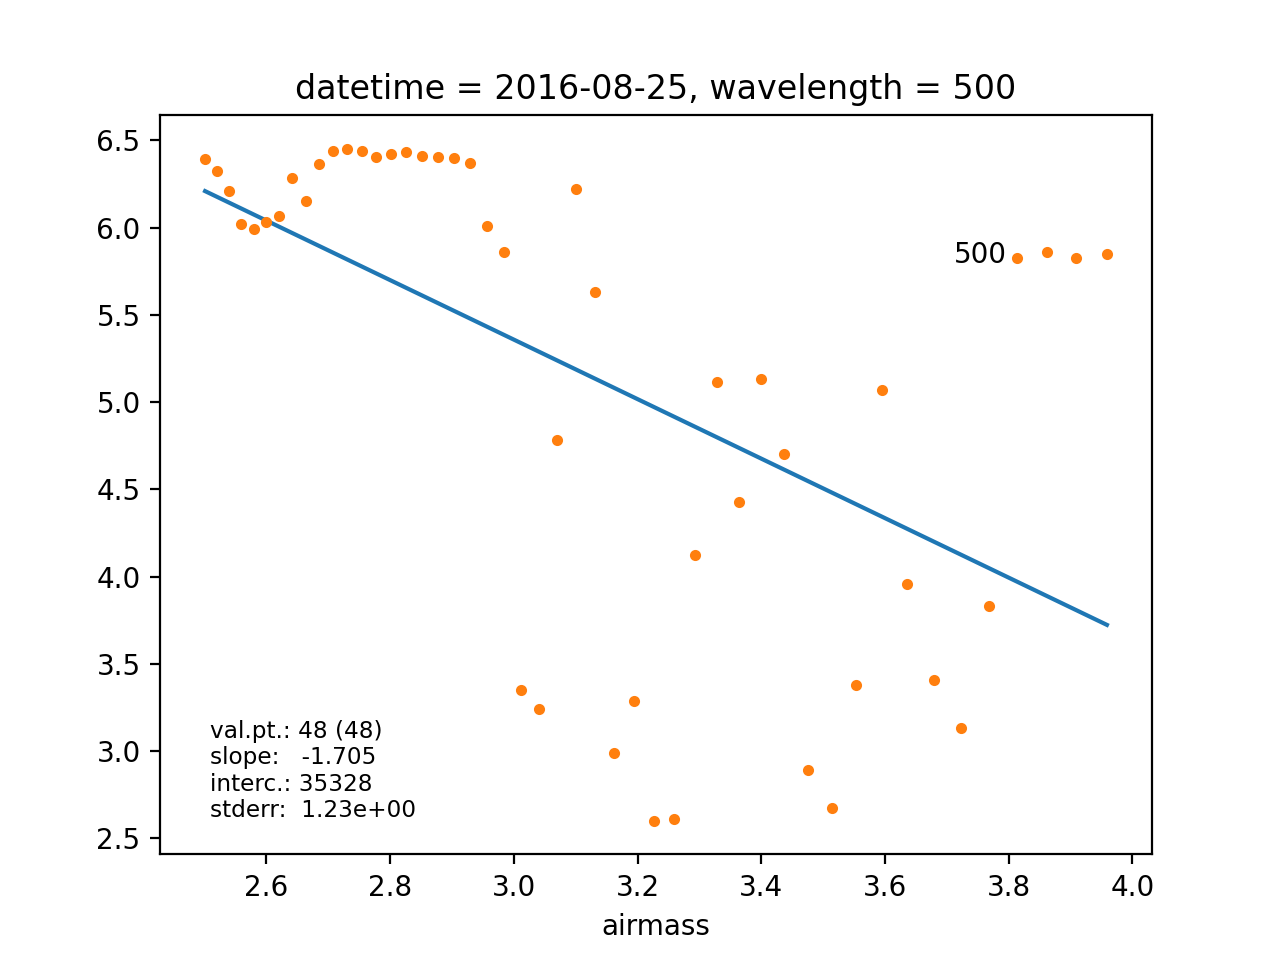

In [17]:
%matplotlib widget
cont.view.plot.initiate()

In [ ]:
out = plot_nicely(cont)

In [ ]:
out = plot_nicely(cont)

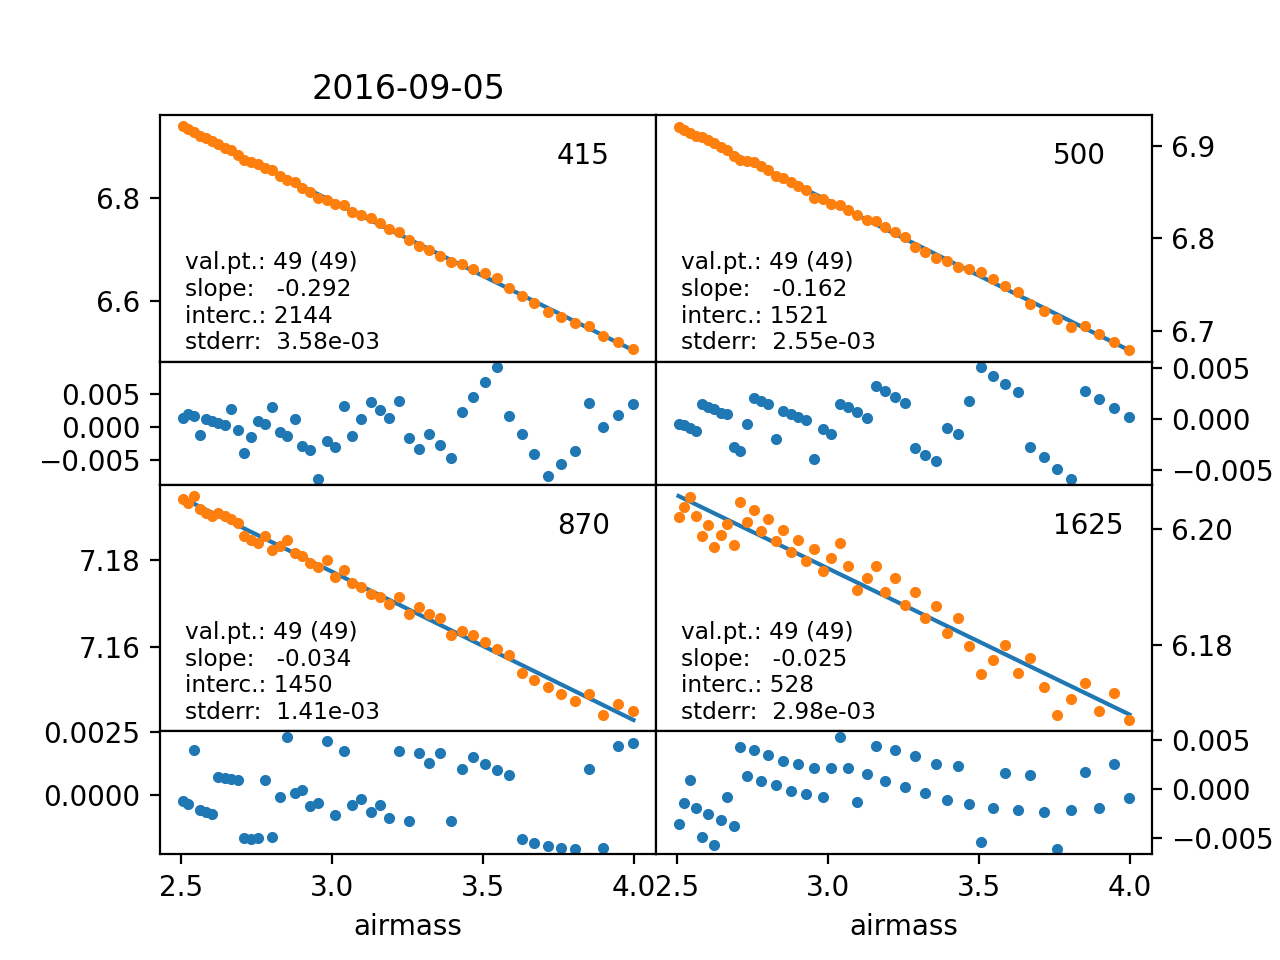

In [26]:
out = plot_nicely(cont)

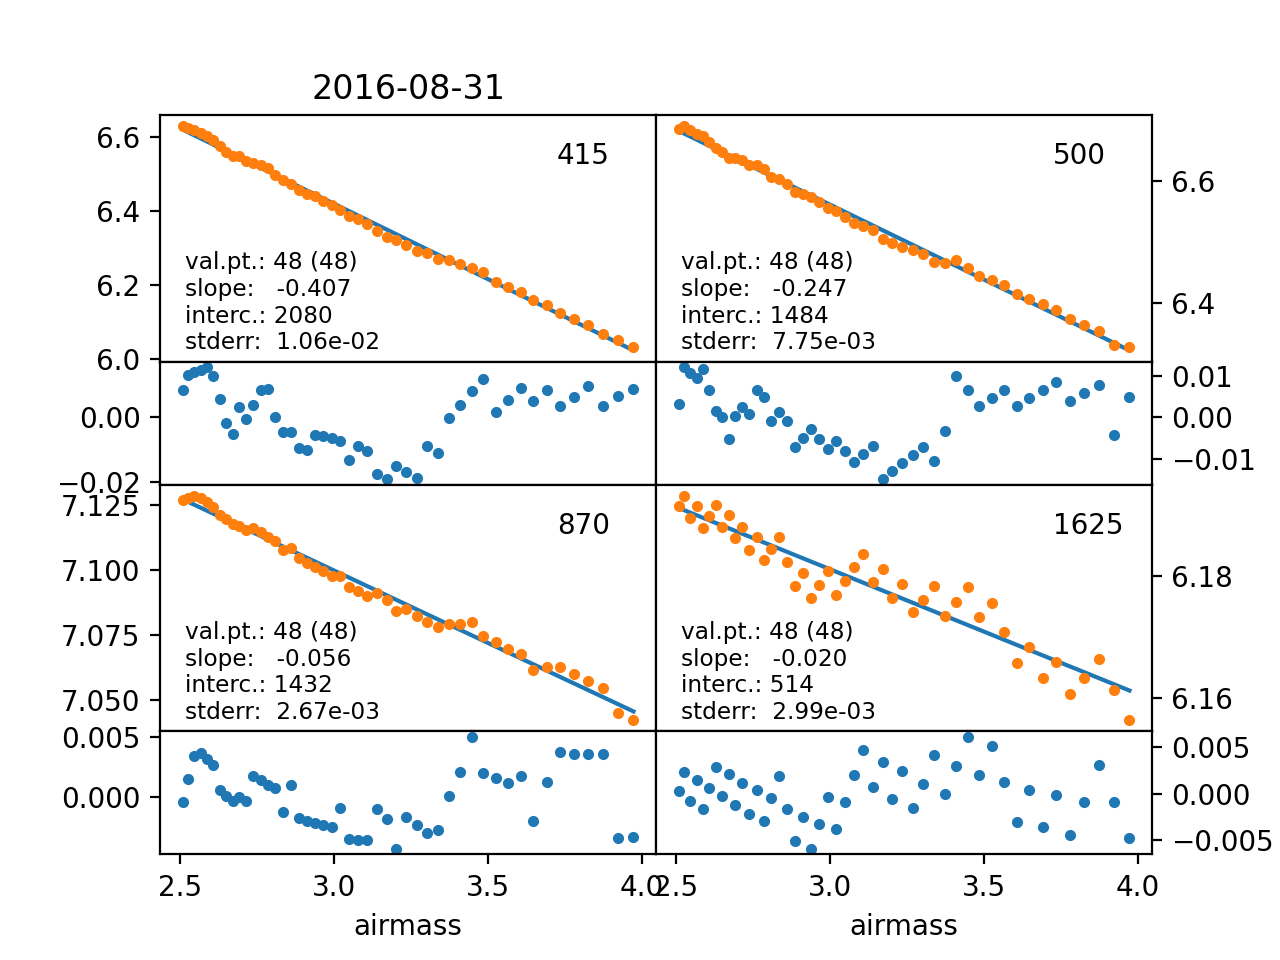

In [25]:
out = plot_nicely(cont)

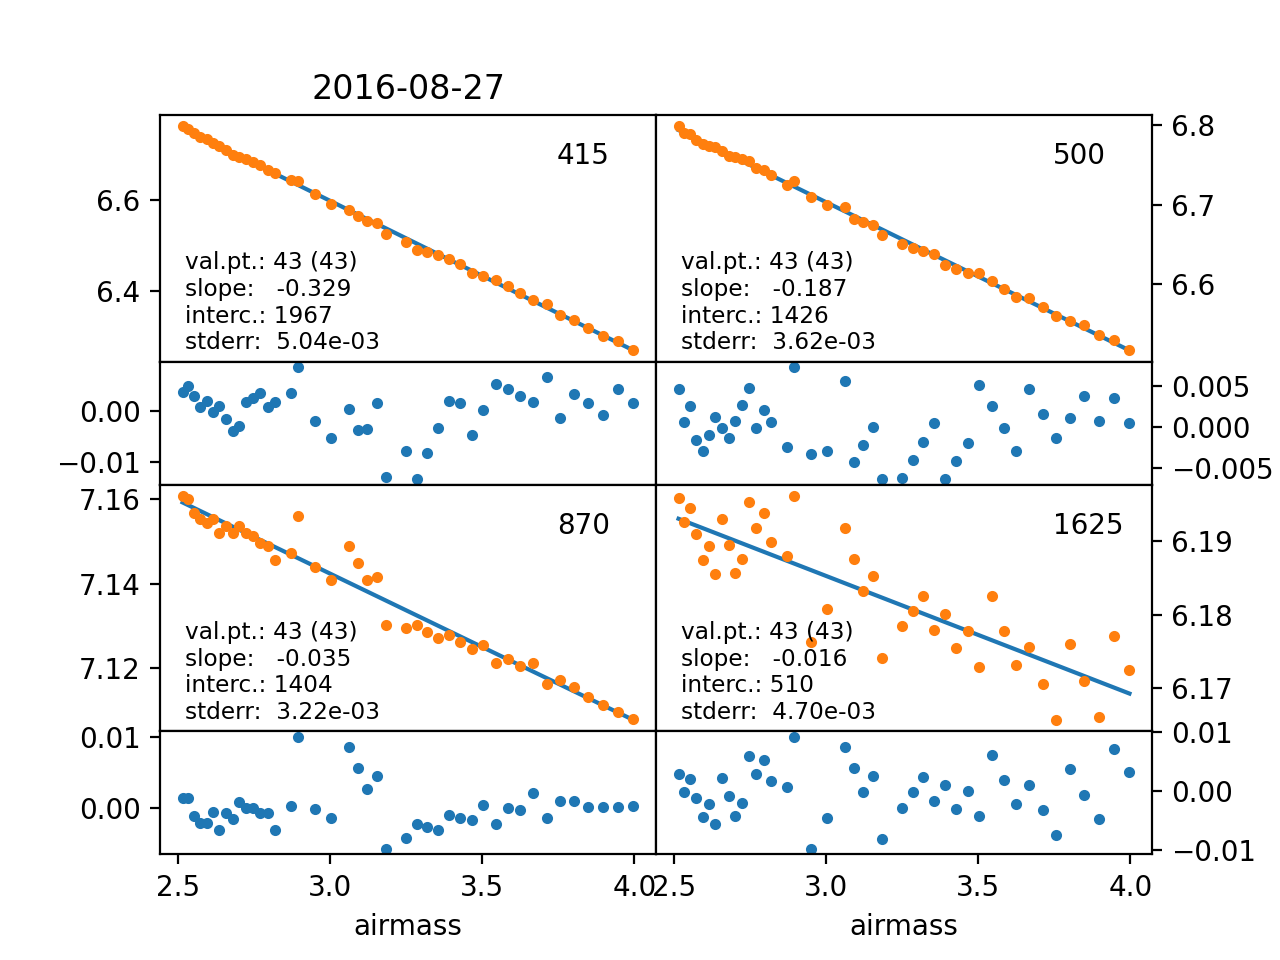

In [23]:
out = plot_nicely(cont)

In [127]:
cont.view.controlls.date_picker.value

Timestamp('2016-08-27 00:00:00')

Text(0.5, 1.0, '')

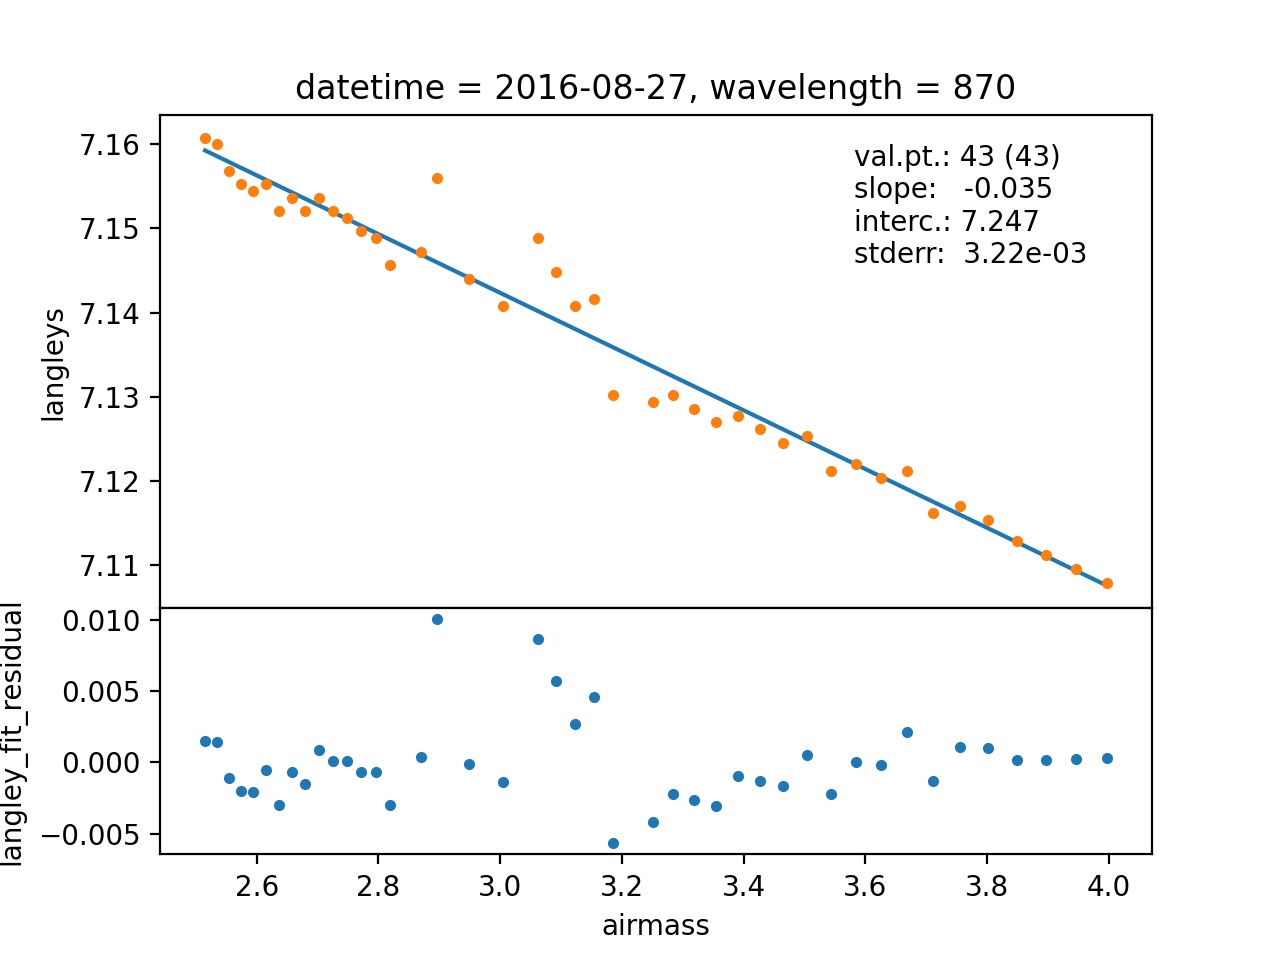

In [215]:
f,aa = plt.subplots(2, sharex=True, gridspec_kw={'hspace':0}, height_ratios=[2,1])
wl = 870
a = aa[0]
fitres.sel(wavelength = wl).plot(ax= a)
dss.langleys.sel(wavelength = wl).plot(ax = a, ls = '', marker = '.')
txt = (f'val.pt.: {dss.valid_points.values} ({dss.airmass.shape[0]})\n'
       f'slope:   {dss.langley_fitres.sel(fit_results = "slope", wavelength = wl).values:0.3f}\n'
       f'interc.: {dss.langley_fitres.sel(fit_results = "intercept", wavelength = wl).values:0.3f}\n'
       f'stderr:  {dss.langley_fitres.sel(fit_results = "intercept_stderr", wavelength = wl).values:0.2e}')
a.text(0.7, 0.7, txt, transform = a.transAxes)

a = aa[1]
dss.langley_fit_residual.sel(wavelength = wl).plot(ax = a, ls = '', marker = '.')
a.set_title('')